**Chama a tabela**


In [ ]:
import pandas as pd
from google.colab import drive

# Monta o seu Google Drive
drive.mount('/content/drive')

# L√™ o arquivo a partir do caminho que voc√™ forneceu
df = pd.read_excel('/content/drive/MyDrive/ICMSanalise/Consolidado repasse 2012 - 2025_estati.xlsx')

# Exibe as primeiras linhas do DataFrame para confirmar que a leitura funcionou
print(df.head())

Mounted at /content/drive
      Ano           Municipio        Janeiro      Fevereiro          Mar√ßo  \
0  2012.0      Angra dos Reis  366649.576890  330553.556013  373614.812793   
1  2012.0             Aperib√©   29195.397083   26321.160403   29750.021555   
2  2012.0            Araruama  161104.195039  145243.763842  164164.688747   
3  2012.0               Areal  108555.044189   97867.986605  110617.262555   
4  2012.0  Arma√ß√£o dos B√∫zios  126159.237170  113739.077034  128555.882096   

           Abril           Maio          Junho          Julho         Agosto  \
0  338853.868622  432250.952211  364828.169865  453392.402852  384146.556065   
1   26982.093724   34419.072010   29050.362956   36102.513326   30588.638169   
2  148890.884324  189929.147884  160303.876884  199218.607363  168792.289948   
3  100325.485151  127977.840902  108015.774727  134237.253849  113735.427496   
4  116595.104078  148731.796882  125532.515266  156006.288532  132179.714718   

        Setembro   

 **Limpeza - Tira o ano 2025 e gera um novo Datafreme**

In [ ]:

# 2. Cria um novo DataFrame chamado 'df_filtrado'
# que cont√©m todas as linhas onde a coluna 'Ano' n√£o √© 2025
df_filtrado = df[df['Ano'] != 2025]
# 3. Exibe o novo DataFrame filtrado (opcional, para confer√™ncia)
print(df_filtrado)


         Ano           Municipio       Janeiro     Fevereiro         Mar√ßo  \
0     2012.0      Angra dos Reis  3.666496e+05  3.305536e+05  3.736148e+05   
1     2012.0             Aperib√©  2.919540e+04  2.632116e+04  2.975002e+04   
2     2012.0            Araruama  1.611042e+05  1.452438e+05  1.641647e+05   
3     2012.0               Areal  1.085550e+05  9.786799e+04  1.106173e+05   
4     2012.0  Arma√ß√£o dos B√∫zios  1.261592e+05  1.137391e+05  1.285559e+05   
...      ...                 ...           ...           ...           ...   
1193  2024.0           Varre-Sai  3.508271e+04  2.816224e+04  2.841884e+04   
1194  2024.0           Vassouras  1.055092e+05  8.469624e+04  8.546796e+04   
1195  2024.0       Volta Redonda  2.764796e+05  2.219408e+05  2.239630e+05   
1288     NaN                 NaN           NaN           NaN           NaN   
1289     NaN                 NaN  2.388900e+08  2.269010e+08  2.186120e+08   

             Abril          Maio         Junho         Jul

**Limpeza - Retira Valores nulos**

In [ ]:
import numpy as np

# 3. Filtra as linhas onde o ano n√£o √© 2025
df_filtrado = df[df['Ano'] != 2025]

# 4. Verifica e substitui valores nulos
print('Quantidade de valores nulos por coluna:')
print(df_filtrado.isnull().sum())
df_filtrado.fillna(0, inplace=True)
print('Quantidade de valores nulos ap√≥s a substitui√ß√£o:')
print(df_filtrado.isnull().sum())

# 5. Remove as linhas que cont√™m zero e calcula a porcentagem removida
df_sem_zeros = df_filtrado.copy()
df_sem_zeros = df_sem_zeros.replace(0, np.nan)
df_sem_zeros.dropna(how='any', inplace=True)

total_linhas_original = df_filtrado.shape[0]
total_linhas_removidas = total_linhas_original - df_sem_zeros.shape[0]
percentual_removido = (total_linhas_removidas / total_linhas_original) * 100

print("\n--- Resumo da Remo√ß√£o ---")
print(f"Total de linhas no DataFrame original: {total_linhas_original}")
print(f"Total de linhas removidas: {total_linhas_removidas}")
print(f"Porcentagem de linhas removidas: {percentual_removido:.2f}%")

Quantidade de valores nulos por coluna:
Ano          2
Municipio    2
Janeiro      1
Fevereiro    1
Mar√ßo        1
Abril        1
Maio         1
Junho        1
Julho        1
Agosto       2
Setembro     2
Outubro      2
Novembro     2
Dezembro     2
dtype: int64
Quantidade de valores nulos ap√≥s a substitui√ß√£o:
Ano          0
Municipio    0
Janeiro      0
Fevereiro    0
Mar√ßo        0
Abril        0
Maio         0
Junho        0
Julho        0
Agosto       0
Setembro     0
Outubro      0
Novembro     0
Dezembro     0
dtype: int64

--- Resumo da Remo√ß√£o ---
Total de linhas no DataFrame original: 1198
Total de linhas removidas: 28
Porcentagem de linhas removidas: 2.34%


/tmp/ipython-input-3535077211.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.fillna(0, inplace=True)


**Analise- Agrupa dados e ordena a jun√ß√£o dos meses com valores totais**

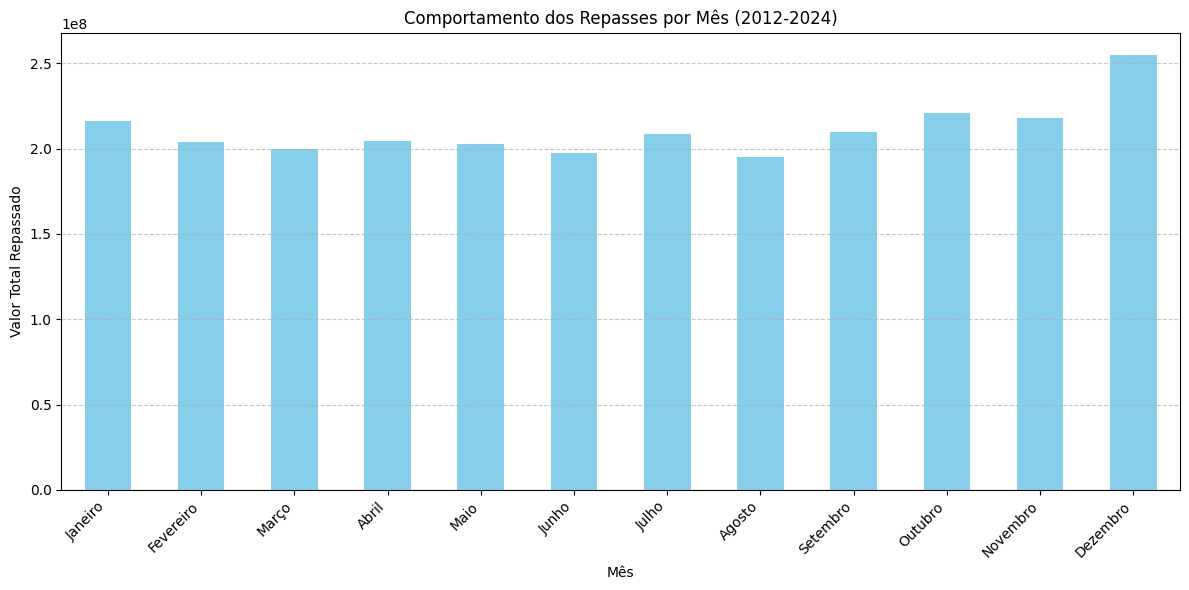


Valores totais de repasse por m√™s:
Mes
Janeiro      2.160525e+08
Fevereiro    2.041209e+08
Mar√ßo        1.999685e+08
Abril        2.043957e+08
Maio         2.025710e+08
Junho        1.977251e+08
Julho        2.087986e+08
Agosto       1.949054e+08
Setembro     2.095638e+08
Outubro      2.211876e+08
Novembro     2.180607e+08
Dezembro     2.551224e+08
Name: Valor_Repassado, dtype: float64


In [ ]:

# Importa as bibliotecas necess√°rias para o restante do c√≥digo
import matplotlib.pyplot as plt
import numpy as np


# 1. "Derrete" o DataFrame para ter uma coluna de meses e outra de valores
# Note que estamos usando 'df_sem_zeros', o DataFrame que voc√™ acabou de limpar
df_melted = pd.melt(df_sem_zeros,
                    id_vars=['Ano', 'Municipio'],
                    var_name='Mes',
                    value_name='Valor_Repassado')

# 2. Agrupa os dados pela nova coluna 'Mes' e soma os valores
comportamento_mensal = df_melted.groupby('Mes')['Valor_Repassado'].sum()

# 3. Ordena os meses corretamente para o gr√°fico
meses_ordenados = ['Janeiro', 'Fevereiro', 'Mar√ßo', 'Abril', 'Maio', 'Junho',
                   'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
comportamento_mensal = comportamento_mensal.reindex(meses_ordenados)

# 4. Gera o gr√°fico de barras
plt.figure(figsize=(12, 6))
comportamento_mensal.plot(kind='bar', color='skyblue')
plt.title('Comportamento dos Repasses por M√™s (2012-2024)')
plt.xlabel('M√™s')
plt.ylabel('Valor Total Repassado')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Opcional: Exibe a tabela com os valores totais de cada m√™s
print("\nValores totais de repasse por m√™s:")
print(comportamento_mensal)

**Analise- Faz a m√©dia dos meses e plota**


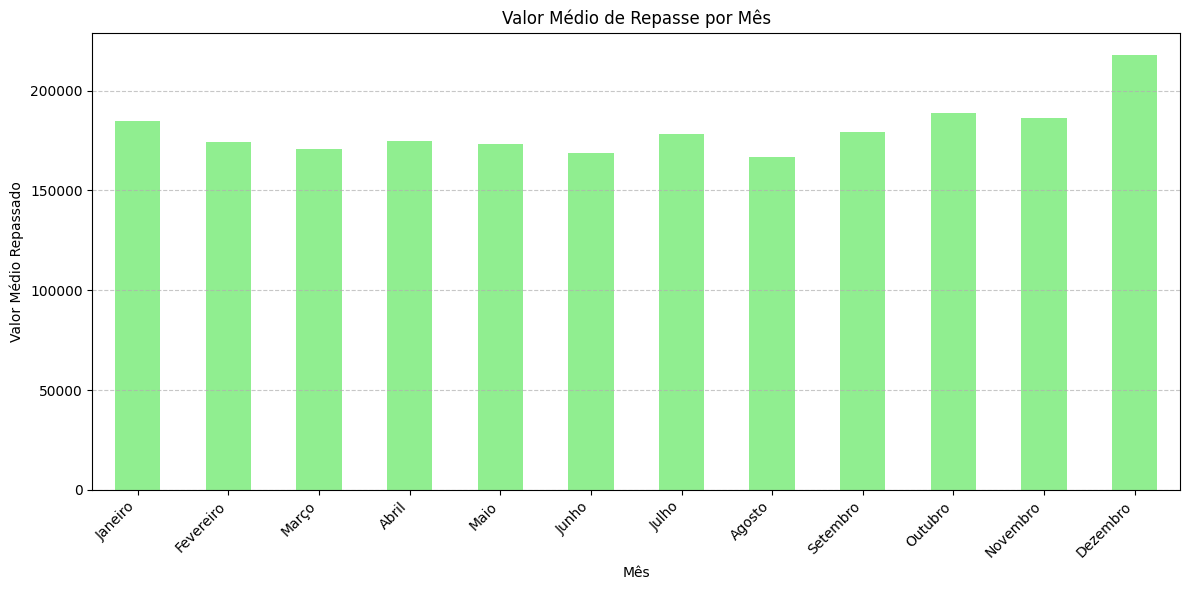


Valor m√©dio de repasse por m√™s:
Mes
Janeiro      184660.289069
Fevereiro    174462.314196
Mar√ßo        170913.266301
Abril        174697.154163
Maio         173137.648907
Junho        168995.845385
Julho        178460.348928
Agosto       166585.788733
Setembro     179114.351765
Outubro      189049.251089
Novembro     186376.642003
Dezembro     218053.301648
Name: Valor_Repassado, dtype: float64


In [ ]:
# M√©dia de repasse por m√™s
media_mensal = df_melted.groupby('Mes')['Valor_Repassado'].mean()

# Plota o gr√°fico de barras
plt.figure(figsize=(12, 6))
media_mensal.reindex(meses_ordenados).plot(kind='bar', color='lightgreen')
plt.title('Valor M√©dio de Repasse por M√™s')
plt.xlabel('M√™s')
plt.ylabel('Valor M√©dio Repassado')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nValor m√©dio de repasse por m√™s:")
print(media_mensal.reindex(meses_ordenados))

**Analise - M√©dia e desvio padr√£o dos meses**

In [ ]:
# Analise descritiva dos valores de repasse por m√™s
analise_mensal = df_melted.groupby('Mes')['Valor_Repassado'].describe()

# Opcional: Para ver apenas a m√©dia e o desvio padr√£o
analise_resumida = analise_mensal[['mean', 'std']]

print("\nEstat√≠sticas descritivas dos repasses por m√™s:")
print(analise_resumida.reindex(meses_ordenados))


Estat√≠sticas descritivas dos repasses por m√™s:
                    mean            std
Mes                                    
Janeiro    184660.289069  170601.789763
Fevereiro  174462.314196  164184.659983
Mar√ßo      170913.266301  156453.064714
Abril      174697.154163  160798.283240
Maio       173137.648907  162655.042212
Junho      168995.845385  157891.884877
Julho      178460.348928  165760.805724
Agosto     166585.788733  155923.509386
Setembro   179114.351765  166158.543451
Outubro    189049.251089  175753.947272
Novembro   186376.642003  173052.478594
Dezembro   218053.301648  202732.132714


**Contagem dos valores por mes**

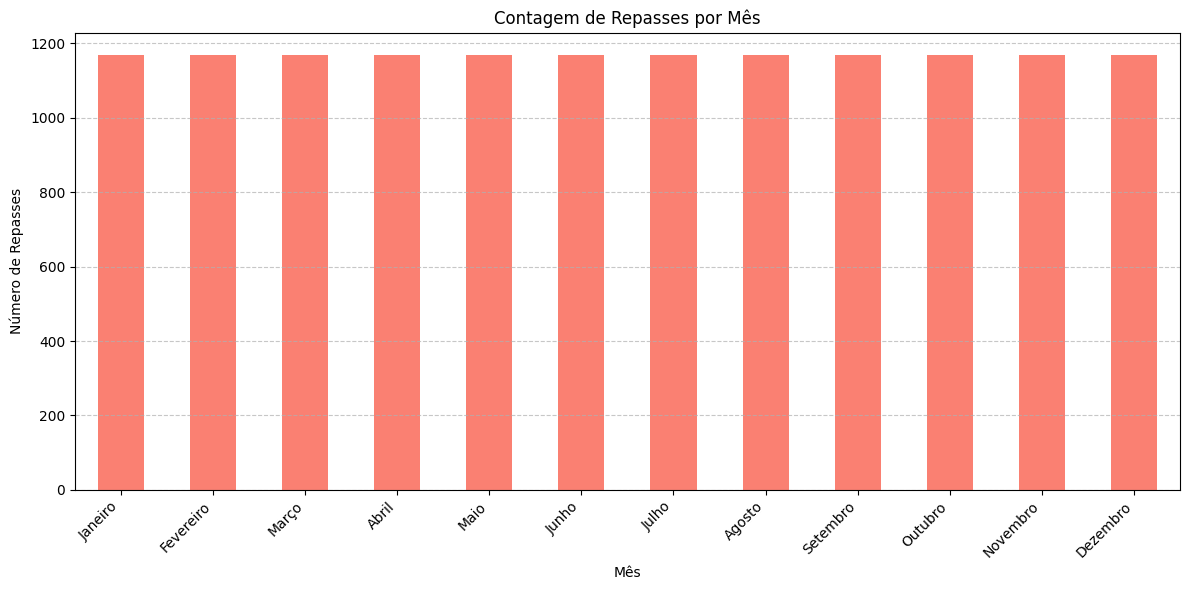


Contagem de repasses por m√™s:
Mes
Janeiro      1170
Fevereiro    1170
Mar√ßo        1170
Abril        1170
Maio         1170
Junho        1170
Julho        1170
Agosto       1170
Setembro     1170
Outubro      1170
Novembro     1170
Dezembro     1170
Name: Valor_Repassado, dtype: int64


In [ ]:
# Contagem de repasses por m√™s
contagem_mensal = df_melted.groupby('Mes')['Valor_Repassado'].count()

# Plota o gr√°fico de barras
plt.figure(figsize=(12, 6))
contagem_mensal.reindex(meses_ordenados).plot(kind='bar', color='salmon')
plt.title('Contagem de Repasses por M√™s')
plt.xlabel('M√™s')
plt.ylabel('N√∫mero de Repasses')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nContagem de repasses por m√™s:")
print(contagem_mensal.reindex(meses_ordenados))

**Analise de tendencia**

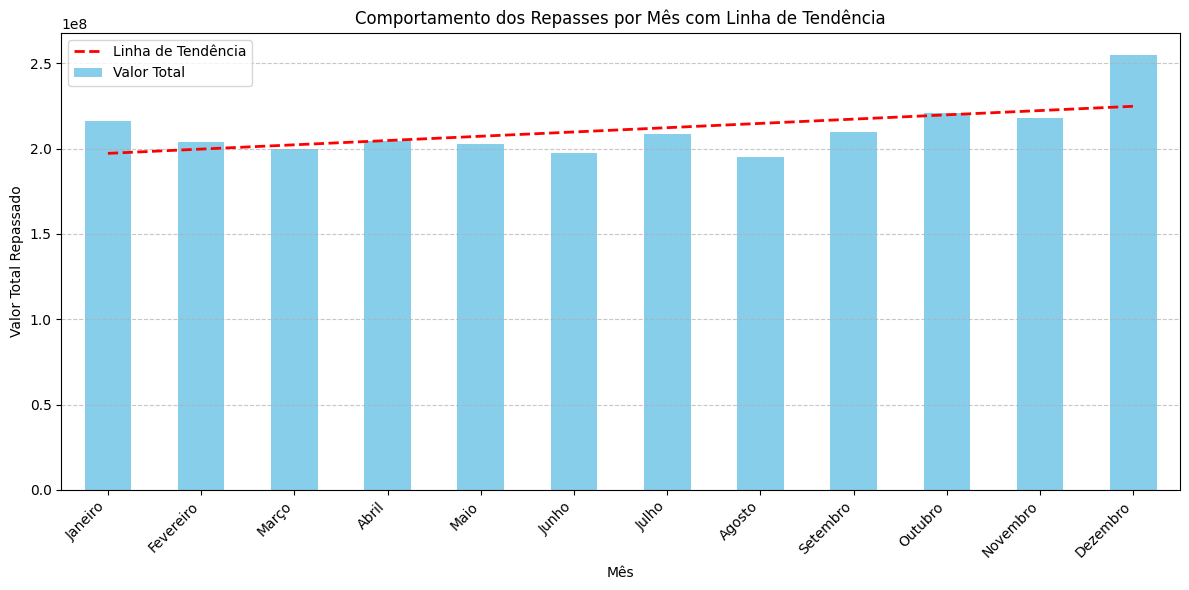


Equa√ß√£o da linha de tend√™ncia: y = 2509359.11x + 197237879.62


In [ ]:
# 1. Agrupa os dados pela nova coluna 'Mes' e soma os valores
comportamento_mensal = df_melted.groupby('Mes')['Valor_Repassado'].sum()

# 2. Reordena os meses
meses_ordenados = ['Janeiro', 'Fevereiro', 'Mar√ßo', 'Abril', 'Maio', 'Junho',
                   'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
comportamento_mensal = comportamento_mensal.reindex(meses_ordenados)

# 3. Calcula a linha de tend√™ncia
x = np.arange(len(comportamento_mensal))
y = comportamento_mensal.values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# 4. Gera o gr√°fico de barras com a linha de tend√™ncia
plt.figure(figsize=(12, 6))
comportamento_mensal.plot(kind='bar', color='skyblue', label='Valor Total')
plt.plot(x, p(x), "r--", linewidth=2, label='Linha de Tend√™ncia')
plt.title('Comportamento dos Repasses por M√™s com Linha de Tend√™ncia')
plt.xlabel('M√™s')
plt.ylabel('Valor Total Repassado')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

print("\nEqua√ß√£o da linha de tend√™ncia: y = {:.2f}x + {:.2f}".format(z[0], z[1]))

Valores Inflados: O gr√°fico com outliers mostra que alguns meses, como Abril, Julho, Outubro e Dezembro, parecem ter repasses totais significativamente mais altos. Isso acontece porque os valores at√≠picos (outliers) est√£o inclu√≠dos na soma total, inflando o resultado desses meses.

Linha de Tend√™ncia Distorcida: A linha de tend√™ncia neste gr√°fico √© influenciada pelos valores extremos. A sua inclina√ß√£o e posi√ß√£o podem n√£o ser a representa√ß√£o mais precisa do comportamento geral dos repasses, pois os outliers "puxam" a linha para cima.

**Analise desvio padrao**

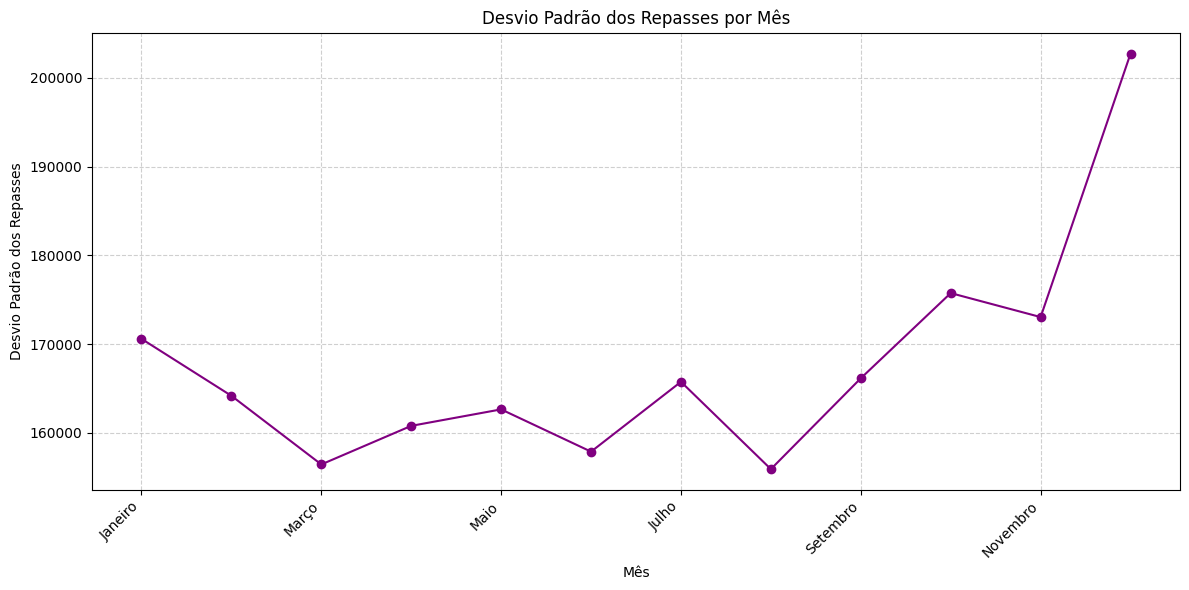


Desvio Padr√£o dos repasses por m√™s:
Mes
Janeiro      170601.789763
Fevereiro    164184.659983
Mar√ßo        156453.064714
Abril        160798.283240
Maio         162655.042212
Junho        157891.884877
Julho        165760.805724
Agosto       155923.509386
Setembro     166158.543451
Outubro      175753.947272
Novembro     173052.478594
Dezembro     202732.132714
Name: Valor_Repassado, dtype: float64


In [ ]:


# 1. Agrupa os dados pela nova coluna 'Mes' e calcula o desvio padr√£o
desvio_padrao_mensal = df_melted.groupby('Mes')['Valor_Repassado'].std()

# 2. Reordena os meses corretamente
meses_ordenados = ['Janeiro', 'Fevereiro', 'Mar√ßo', 'Abril', 'Maio', 'Junho',
                   'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
desvio_padrao_mensal = desvio_padrao_mensal.reindex(meses_ordenados)

# 3. Gera o gr√°fico de linha
plt.figure(figsize=(12, 6))
desvio_padrao_mensal.plot(kind='line', marker='o', color='purple', linestyle='-')
plt.title('Desvio Padr√£o dos Repasses por M√™s')
plt.xlabel('M√™s')
plt.ylabel('Desvio Padr√£o dos Repasses')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Opcional: Exibe os valores calculados
print("\nDesvio Padr√£o dos repasses por m√™s:")
print(desvio_padrao_mensal)

 O gr√°fico com outliers mostra uma volatilidade muito alta, com picos acentuados, especialmente em dezembro. Isso indica que os repasses variaram drasticamente nesses meses, provavelmente devido a um ou mais valores at√≠picos. Os outliers estavam inflando o desvio padr√£o e dando a impress√£o de que a s√©rie temporal era muito inst√°vel.



**Correla√ß√£o Spearman**

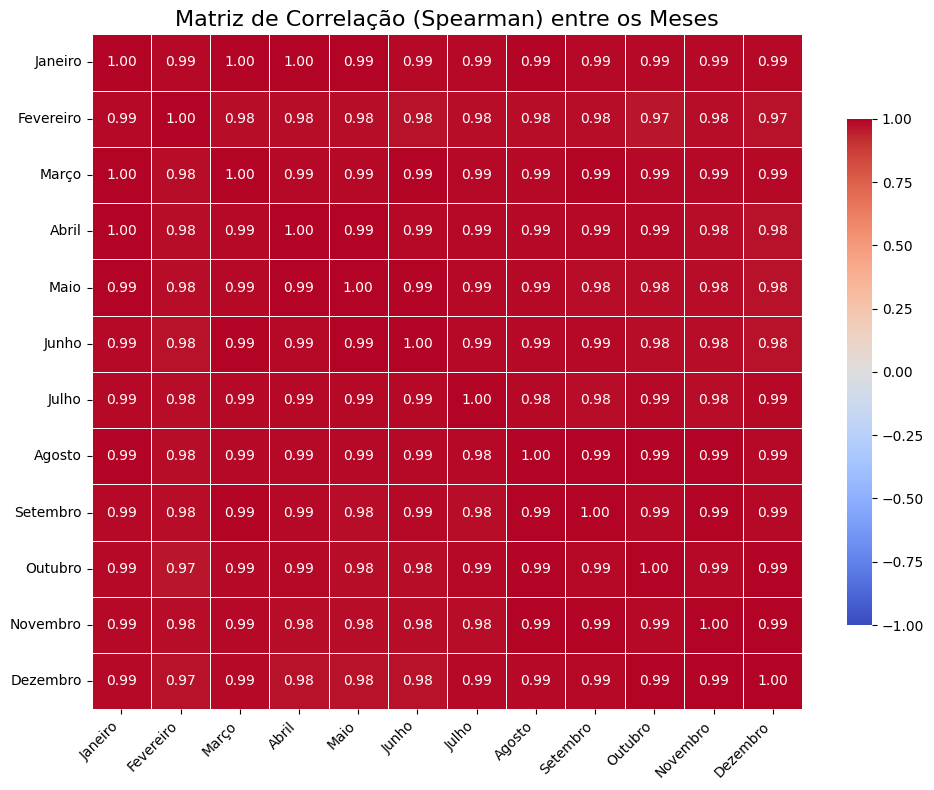

In [ ]:
# Importa a biblioteca necess√°ria para o gr√°fico
import seaborn as sns
import matplotlib.pyplot as plt

# Define as colunas de meses
meses_colunas = ['Janeiro', 'Fevereiro', 'Mar√ßo', 'Abril', 'Maio', 'Junho',
                 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Calcula a matriz de correla√ß√£o de Spearman
# Usamos o df_filtrado que j√° est√° limpo das etapas anteriores
matriz_correlacao_meses = df_filtrado[meses_colunas].corr(method='spearman')

# Plota a matriz de correla√ß√£o usando a paleta 'coolwarm'
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao_meses,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5,
            cbar_kws={"shrink": .75},
            vmin=-1,
            vmax=1)
plt.title('Matriz de Correla√ß√£o (Spearman) entre os Meses', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Decomposi√ß√£o de s√©rie temporal, uma t√©cnica que divide os dados em seus componentes principais. O objetivo √© identificar e visualizar a tend√™ncia, a sazonalidade e a aleatoriedade (res√≠duo) nos seus dados de repasse**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# 4. Cria a s√©rie temporal: soma os repasses por m√™s e define a data como √≠ndice
serie_temporal = df_melted.groupby('Data')['Valor_Repassado'].sum()

# 5. Realiza a decomposi√ß√£o da s√©rie temporal
decomposicao = seasonal_decompose(serie_temporal, model='additive', period=12)

# 6. Plota os resultados
decomposicao.plot()
plt.suptitle('Decomposi√ß√£o da S√©rie Temporal de Repasses Mensais (com outliers)', y=1.02)
plt.show()

KeyError: 'Data'

S√©rie Original: Voc√™ pode ver uma linha do tempo com picos e vales ao longo dos anos. A linha de tend√™ncia mostra um crescimento geral nos repasses ao longo do tempo.

Tend√™ncia: A linha de tend√™ncia mostra um crescimento geral nos repasses ao longo dos anos, com um crescimento acentuado por volta de 2021.

Sazonalidade: O gr√°fico de sazonalidade mostra um padr√£o claro e consistente, indicando que os repasses t√™m picos e vales em meses espec√≠ficos a cada ano.

Res√≠duo: O gr√°fico de res√≠duos mostra a varia√ß√£o que n√£o √© explicada pela tend√™ncia ou sazonalidade. Ele cont√©m um ponto isolado e bem acima dos outros (por volta de 2018), que √© um outlier. Esse valor at√≠pico distorce a an√°lise e a visualiza√ß√£o.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
import numpy as np



# 2. Cria a s√©rie temporal: soma os repasses por m√™s e define a data como √≠ndice
serie_temporal = df_melted.groupby('Data')['Valor_Repassado'].sum()

# 3. Plota o gr√°fico de autocorrela√ß√£o (ACF)
plt.figure(figsize=(10, 6))
plot_acf(serie_temporal, lags=24) # A fun√ß√£o agora est√° definida!
plt.title('Gr√°fico de Autocorrela√ß√£o dos Repasses Mensais (com outliers)')
plt.xlabel('Meses de Defasagem (Lag)')
plt.ylabel('Coeficiente de Autocorrela√ß√£o')
plt.grid(True)
plt.show()

# 4. Calcula a autocorrela√ß√£o para o primeiro lag
autocorr_lag1 = serie_temporal.autocorr(lag=1)
print(f"\nCorrela√ß√£o entre um m√™s e o pr√≥ximo (Lag 1): {autocorr_lag1:.2f}")

KeyError: 'Data'

Autocorrela√ß√£o Forte: As barras nos primeiros lags (meses de defasagem) s√£o muito altas e se estendem al√©m da banda de confian√ßa (a √°rea azul). Isso indica que h√° uma forte correla√ß√£o entre os repasses de um m√™s e os meses seguintes.

Decaimento Lento: As barras decaem lentamente, o que √© um sinal claro de uma tend√™ncia nos dados. Isso significa que os valores est√£o consistentemente crescendo ou diminuindo ao longo do tempo.

Influ√™ncia dos Outliers: A presen√ßa de outliers pode inflar os valores de correla√ß√£o e distorcer a percep√ß√£o da tend√™ncia. O decaimento da correla√ß√£o que voc√™ v√™ pode ser mais acentuado ou ter um formato diferente se os valores at√≠picos fossem removidos


OUTLIERS


Esse c√≥digo realiza uma an√°lise de valores at√≠picos (outliers) usando o m√©todo do Intervalo Interquartil (IQR). O objetivo √© identificar valores que se desviam significativamente do padr√£o geral dos dados e, em seguida, calcular a porcentagem desses valores em rela√ß√£o ao total

In [ ]:

# 1. Calcula os quartis e o Intervalo Interquartil (IQR)
Q1 = df_melted['Valor_Repassado'].quantile(0.25)
Q3 = df_melted['Valor_Repassado'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define os limites para identificar os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("--- An√°lise de Valores At√≠picos (Outliers) ---")
print(f"Q1 (25¬∫ percentil): R$ {Q1:,.2f}")
print(f"Q3 (75¬∫ percentil): R$ {Q3:,.2f}")
print(f"IQR: R$ {IQR:,.2f}")
print(f"Limite Inferior: R$ {limite_inferior:,.2f}")
print(f"Limite Superior: R$ {limite_superior:,.2f}")

# 3. Encontra os valores at√≠picos
outliers = df_melted[(df_melted['Valor_Repassado'] < limite_inferior) | (df_melted['Valor_Repassado'] > limite_superior)]

# 4. Exibe a tabela de outliers encontrados
print("\nValores At√≠picos Encontrados:")
if outliers.empty:
    print("Nenhum valor at√≠pico foi encontrado nos dados.")
else:
    # Mostra os outliers ordenados do maior para o menor valor
    outliers_ordenados = outliers.sort_values(by='Valor_Repassado', ascending=False)
    print(outliers_ordenados)

# 5. Calcula e exibe a porcentagem de outliers
total_linhas = len(df_melted)
porcentagem_outliers = (len(outliers) / total_linhas) * 100

print(f"\nOs outliers representam {porcentagem_outliers:.2f}% do total de linhas.")

--- An√°lise de Valores At√≠picos (Outliers) ---
Q1 (25¬∫ percentil): R$ 59,595.13
Q3 (75¬∫ percentil): R$ 256,664.15
IQR: R$ 197,069.02
Limite Inferior: R$ -236,008.40
Limite Superior: R$ 552,267.68

Valores At√≠picos Encontrados:
          Ano             Municipio        Mes  Valor_Repassado
13961  2024.0  Cachoeiras de Macacu   Dezembro     1.227599e+06
13692  2021.0  Cachoeiras de Macacu   Dezembro     1.190299e+06
14013  2024.0             Rio Claro   Dezembro     1.151919e+06
13739  2021.0             Rio Claro   Dezembro     1.137269e+06
1776   2018.0             Rio Claro  Fevereiro     1.125915e+06
...       ...                   ...        ...              ...
13641  2020.0                Paraty   Dezembro     5.526043e+05
8343   2013.0             Rio Claro     Agosto     5.524797e+05
13637  2020.0         Nova Friburgo   Dezembro     5.524335e+05
2564   2014.0        Miguel Pereira      Mar√ßo     5.523812e+05
12053  2015.0          Silva Jardim   Novembro     5.522896e+05

Esse c√≥digo realiza uma

an√°lise detalhada dos valores at√≠picos (outliers), indo al√©m da simples identifica√ß√£o para fornecer um contexto sobre cada um deles

In [ ]:

# 2. Encontra os valores at√≠picos usando o m√©todo IQR
Q1 = df_melted['Valor_Repassado'].quantile(0.25)
Q3 = df_melted['Valor_Repassado'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
outliers = df_melted[(df_melted['Valor_Repassado'] > limite_superior)].copy()

print("--- An√°lise Detalhada dos Valores At√≠picos ---")
print(f"Valores acima de R$ {limite_superior:,.2f} s√£o considerados at√≠picos.\n")

# 3. Itera sobre cada outlier para fornecer contexto
if outliers.empty:
    print("Nenhum valor at√≠pico foi encontrado para an√°lise.")
else:
    # Mostra os outliers ordenados do maior para o menor valor
    outliers_ordenados = outliers.sort_values(by='Valor_Repassado', ascending=False).reset_index(drop=True)

    for index, outlier in outliers_ordenados.iterrows():
        municipio = outlier['Municipio']
        ano = outlier['Ano']
        mes = outlier['Mes']
        valor = outlier['Valor_Repassado']

        # Calcula a m√©dia de repasse para o munic√≠pio do outlier
        media_municipio = df_melted[df_melted['Municipio'] == municipio]['Valor_Repassado'].mean()

        # Calcula a m√©dia de repasse para o m√™s do outlier, em todos os anos
        media_mes = df_melted[df_melted['Mes'] == mes]['Valor_Repassado'].mean()

        print(f"[{index + 1}/{len(outliers)}]")
        print(f"üìç Outlier: {municipio} - {mes}/{ano}")
        print(f"   ‚Ä¢ Valor At√≠pico: R$ {valor:,.2f}")
        print(f"   ‚Ä¢ M√©dia deste Munic√≠pio: R$ {media_municipio:,.2f}")
        print(f"   ‚Ä¢ M√©dia deste M√™s ({mes}): R$ {media_mes:,.2f}")
        print("-" * 40)

--- An√°lise Detalhada dos Valores At√≠picos ---
Valores acima de R$ 552,267.68 s√£o considerados at√≠picos.

[1/577]
üìç Outlier: Cachoeiras de Macacu - Dezembro/2024.0
   ‚Ä¢ Valor At√≠pico: R$ 1,227,599.32
   ‚Ä¢ M√©dia deste Munic√≠pio: R$ 719,624.20
   ‚Ä¢ M√©dia deste M√™s (Dezembro): R$ 218,053.30
----------------------------------------
[2/577]
üìç Outlier: Cachoeiras de Macacu - Dezembro/2021.0
   ‚Ä¢ Valor At√≠pico: R$ 1,190,299.24
   ‚Ä¢ M√©dia deste Munic√≠pio: R$ 719,624.20
   ‚Ä¢ M√©dia deste M√™s (Dezembro): R$ 218,053.30
----------------------------------------
[3/577]
üìç Outlier: Rio Claro - Dezembro/2024.0
   ‚Ä¢ Valor At√≠pico: R$ 1,151,919.05
   ‚Ä¢ M√©dia deste Munic√≠pio: R$ 649,603.30
   ‚Ä¢ M√©dia deste M√™s (Dezembro): R$ 218,053.30
----------------------------------------
[4/577]
üìç Outlier: Rio Claro - Dezembro/2021.0
   ‚Ä¢ Valor At√≠pico: R$ 1,137,269.31
   ‚Ä¢ M√©dia deste Munic√≠pio: R$ 649,603.30
   ‚Ä¢ M√©dia deste M√™s (Dezembro): R$ 218,053.30
-

Esse c√≥digo realiza uma an√°lise e visualiza√ß√£o dos repasses por munic√≠pio. O objetivo √© identificar os munic√≠pios que receberam a maior e a menor quantidade de repasses e, em seguida, gerar um gr√°fico para visualizar essa distribui√ß√£o.

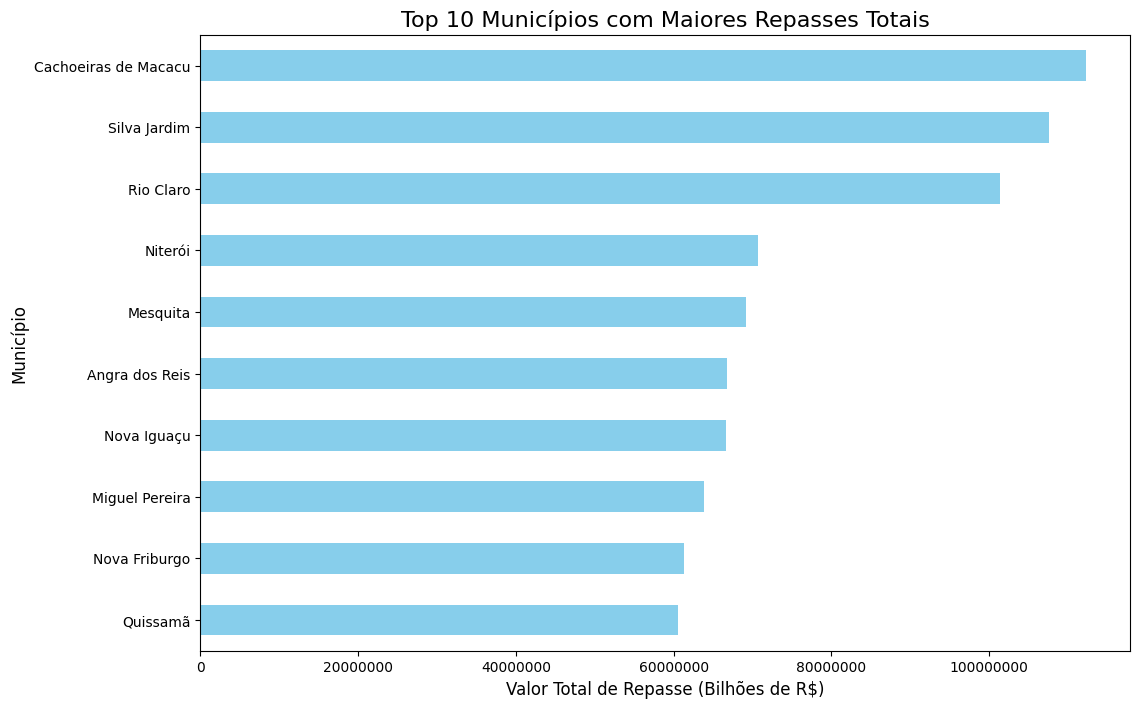

--- Top 5 Munic√≠pios com Maiores Repasses ---
Municipio
Cachoeiras de Macacu    R$ 0.11 Bi
Silva Jardim            R$ 0.11 Bi
Rio Claro               R$ 0.10 Bi
Niter√≥i                 R$ 0.07 Bi
Mesquita                R$ 0.07 Bi
Name: Valor_Repassado, dtype: object

--- Top 5 Munic√≠pios com Menores Repasses ---
Municipio
S√£o Francisco de Itabapoana    R$ 0.00 Bi
Bom Jesus do Itabapoana        R$ 0.00 Bi
Varre-Sai                      R$ 0.00 Bi
Italva                         R$ 0.00 Bi
Itaperuna                      R$ 0.00 Bi
Name: Valor_Repassado, dtype: object


In [ ]:




# 1. Agrupa os dados por Munic√≠pio e calcula o total de repasse
repasse_por_municipio = df_melted.groupby('Municipio')['Valor_Repassado'].sum()

# 2. Ordena os valores para encontrar os maiores e menores
top_10_municipios = repasse_por_municipio.nlargest(10)
bottom_5_municipios = repasse_por_municipio.nsmallest(5)

# 3. Gera o gr√°fico de barras para os 10 maiores
plt.figure(figsize=(12, 8))
top_10_municipios.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Top 10 Munic√≠pios com Maiores Repasses Totais', fontsize=16)
plt.xlabel('Valor Total de Repasse (Bilh√µes de R$)', fontsize=12)
plt.ylabel('Munic√≠pio', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

# 4. Imprime as tabelas para uma visualiza√ß√£o clara
print("--- Top 5 Munic√≠pios com Maiores Repasses ---")
print((top_10_municipios.nlargest(5) / 1_000_000_000).apply(lambda x: f"R$ {x:.2f} Bi"))

print("\n--- Top 5 Munic√≠pios com Menores Repasses ---")
print((bottom_5_municipios / 1_000_000_000).apply(lambda x: f"R$ {x:.2f} Bi"))

Esse c√≥digo realiza uma decomposi√ß√£o de s√©rie temporal, uma t√©cnica que divide os dados em seus componentes principais. O objetivo √© identificar e visualizar a tend√™ncia, a sazonalidade e a aleatoriedade (res√≠duo) nos seus dados de repasse. - Sem outliers

In [ ]:


# 5. Cria a s√©rie temporal: soma os repasses por m√™s e define a data como √≠ndice
serie_temporal = df_sem_outliers.groupby('Data')['Valor_Repassado'].sum()

# 6. Realiza a decomposi√ß√£o da s√©rie temporal
decomposicao = seasonal_decompose(serie_temporal, model='additive', period=12)

# 7. Plota os resultados
decomposicao.plot()
plt.suptitle('Decomposi√ß√£o da S√©rie Temporal de Repasses Mensais (sem outliers)', y=1.02)
plt.show()

NameError: name 'df_sem_outliers' is not defined

Tend√™ncia: A linha de tend√™ncia ainda mostra o mesmo padr√£o de crescimento geral, mas a curva est√° mais suave e uniforme. Isso reflete a tend√™ncia real dos repasses de forma mais precisa, sem a influ√™ncia dos valores extremos.

Sazonalidade: A sazonalidade continua presente e √© muito clara. No entanto, sua amplitude se torna mais uniforme, o que refor√ßa a ideia de um padr√£o anual est√°vel nos repasses.

Res√≠duo: O gr√°fico de res√≠duos, agora sem os outliers, mostra uma nuvem de pontos muito mais concentrada em torno da linha zero. Isso indica que a maior parte da varia√ß√£o na s√©rie √© explicada pela tend√™ncia e sazonalidade, e os dados s√£o muito mais consistentes.

In [ ]:
# 5. Cria a s√©rie temporal: soma os repasses por m√™s e define a data como √≠ndice
serie_temporal = df_sem_outliers.groupby('Data')['Valor_Repassado'].sum()

# 6. Plota o gr√°fico de autocorrela√ß√£o (ACF)
plt.figure(figsize=(10, 6))
plot_acf(serie_temporal, lags=24)
plt.title('Gr√°fico de Autocorrela√ß√£o dos Repasses Mensais (sem outliers)')
plt.xlabel('Meses de Defasagem (Lag)')
plt.ylabel('Coeficiente de Autocorrela√ß√£o')
plt.grid(True)
plt.show()

# 7. Calcula a autocorrela√ß√£o para o primeiro lag
autocorr_lag1 = serie_temporal.autocorr(lag=1)
print(f"\nCorrela√ß√£o entre um m√™s e o pr√≥ximo (Lag 1): {autocorr_lag1:.2f}")

NameError: name 'df_sem_outliers' is not defined

Tend√™ncia Suavizada: O decaimento gradual da correla√ß√£o continua presente, mas a curva est√° mais suave. Isso confirma que a tend√™ncia est√° presente, mas agora a sua visualiza√ß√£o n√£o est√° sendo distorcida por valores extremos.

Sazonalidade Mais Clara: Embora a tend√™ncia ainda seja o principal fator, a remo√ß√£o dos outliers permite que a sazonalidade se mostre de forma mais n√≠tida.

Correla√ß√£o mais Robusta: A autocorrela√ß√£o do lag 1 ainda √© positiva e forte, mas agora ela reflete a rela√ß√£o real entre os meses, sem a influ√™ncia dos valores at√≠picos.

**Esse c√≥digo realiza uma an√°lise detalhada e contextualizada dos valores at√≠picos (outliers) mais extremos**

In [ ]:


# 1. Encontra os valores at√≠picos usando o m√©todo IQR
Q1 = df_melted['Valor_Repassado'].quantile(0.25)
Q3 = df_melted['Valor_Repassado'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
outliers = df_melted[(df_melted['Valor_Repassado'] > limite_superior)].copy()

print("--- An√°lise dos 5 Repasses Mais Fora da Linha ---")
print(f"Estes s√£o os repasses acima de R$ {limite_superior:,.2f}.\n")

# 2. Itera sobre os 5 principais outliers para fornecer contexto
if outliers.empty:
    print("Nenhum valor at√≠pico foi encontrado para an√°lise.")
else:
    # Mostra os 5 outliers ordenados do maior para o menor valor
    outliers_ordenados = outliers.sort_values(by='Valor_Repassado', ascending=False).reset_index(drop=True)

    for index, outlier in outliers_ordenados.head(5).iterrows():
        municipio = outlier['Municipio']
        ano = outlier['Ano'] # Corre√ß√£o do nome da coluna
        mes = outlier['Mes']
        valor = outlier['Valor_Repassado']

        # Calcula a m√©dia de repasse para o munic√≠pio do outlier
        media_municipio = df_melted[df_melted['Municipio'] == municipio]['Valor_Repassado'].mean()

        # Calcula a m√©dia de repasse para o m√™s do outlier, em todos os anos
        media_mes = df_melted[df_melted['Mes'] == mes]['Valor_Repassado'].mean()

        print(f"[{index + 1}/{len(outliers)}]")
        print(f"üìç Outlier: {municipio} - {mes}/{ano}")
        print(f"   ‚Ä¢ Valor At√≠pico: R$ {valor:,.2f}")
        print(f"   ‚Ä¢ M√©dia deste Munic√≠pio: R$ {media_municipio:,.2f}")
        print(f"   ‚Ä¢ M√©dia deste M√™s ({mes}): R$ {media_mes:,.2f}")
        print("-" * 40)

--- An√°lise dos 5 Repasses Mais Fora da Linha ---
Estes s√£o os repasses acima de R$ 552,267.68.

[1/577]
üìç Outlier: Cachoeiras de Macacu - Dezembro/2024.0
   ‚Ä¢ Valor At√≠pico: R$ 1,227,599.32
   ‚Ä¢ M√©dia deste Munic√≠pio: R$ 719,624.20
   ‚Ä¢ M√©dia deste M√™s (Dezembro): R$ 218,053.30
----------------------------------------
[2/577]
üìç Outlier: Cachoeiras de Macacu - Dezembro/2021.0
   ‚Ä¢ Valor At√≠pico: R$ 1,190,299.24
   ‚Ä¢ M√©dia deste Munic√≠pio: R$ 719,624.20
   ‚Ä¢ M√©dia deste M√™s (Dezembro): R$ 218,053.30
----------------------------------------
[3/577]
üìç Outlier: Rio Claro - Dezembro/2024.0
   ‚Ä¢ Valor At√≠pico: R$ 1,151,919.05
   ‚Ä¢ M√©dia deste Munic√≠pio: R$ 649,603.30
   ‚Ä¢ M√©dia deste M√™s (Dezembro): R$ 218,053.30
----------------------------------------
[4/577]
üìç Outlier: Rio Claro - Dezembro/2021.0
   ‚Ä¢ Valor At√≠pico: R$ 1,137,269.31
   ‚Ä¢ M√©dia deste Munic√≠pio: R$ 649,603.30
   ‚Ä¢ M√©dia deste M√™s (Dezembro): R$ 218,053.30
------------

**Esse c√≥digo realiza uma an√°lise de impacto da remo√ß√£o de outliers, comparando as estat√≠sticas descritivas de seus dados com e sem os valores at√≠picos. O objetivo √© mostrar como a presen√ßa de outliers afeta a distribui√ß√£o e as m√©tricas principais do seu conjunto de dados**

In [ ]:
# 1. Identifica os outliers usando o m√©todo IQR
Q1 = df_melted['Valor_Repassado'].quantile(0.25)
Q3 = df_melted['Valor_Repassado'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
outliers_indices = df_melted[(df_melted['Valor_Repassado'] > limite_superior)].index

# 2. Cria um novo DataFrame sem os outliers
df_sem_outliers = df_melted.drop(outliers_indices)

# 3. Compara as estat√≠sticas descritivas
print("--- Estat√≠sticas com TODOS os dados ---")
print(df_melted['Valor_Repassado'].describe().apply(lambda x: f"{x:,.2f}"))

print("\n--- Estat√≠sticas SEM os outliers ---")
print(df_sem_outliers['Valor_Repassado'].describe().apply(lambda x: f"{x:,.2f}"))

# Opcional: Mostra a porcentagem de dados removida
total_dados = len(df_melted)
porcentagem_removida = (len(outliers_indices) / total_dados) * 100
print(f"\nOs {len(outliers_indices)} outliers representam {porcentagem_removida:.2f}% do total de dados.")

--- Estat√≠sticas com TODOS os dados ---
count       14,040.00
mean       180,375.52
std        168,556.08
min             51.13
25%         59,595.13
50%        120,366.01
75%        256,664.15
max      1,227,599.32
Name: Valor_Repassado, dtype: object

--- Estat√≠sticas SEM os outliers ---
count     13,463.00
mean     157,921.95
std      128,845.09
min           51.13
25%       57,357.39
50%      113,128.52
75%      233,540.63
max      551,928.86
Name: Valor_Repassado, dtype: object

Os 577 outliers representam 4.11% do total de dados.


**Esse c√≥digo realiza uma an√°lise e visualiza√ß√£o da correla√ß√£o entre os repasses mensais, utilizando um mapa de calor para facilitar a interpreta√ß√£o. O objetivo √© entender se o repasse de um m√™s tem alguma rela√ß√£o com o repasse de outro**

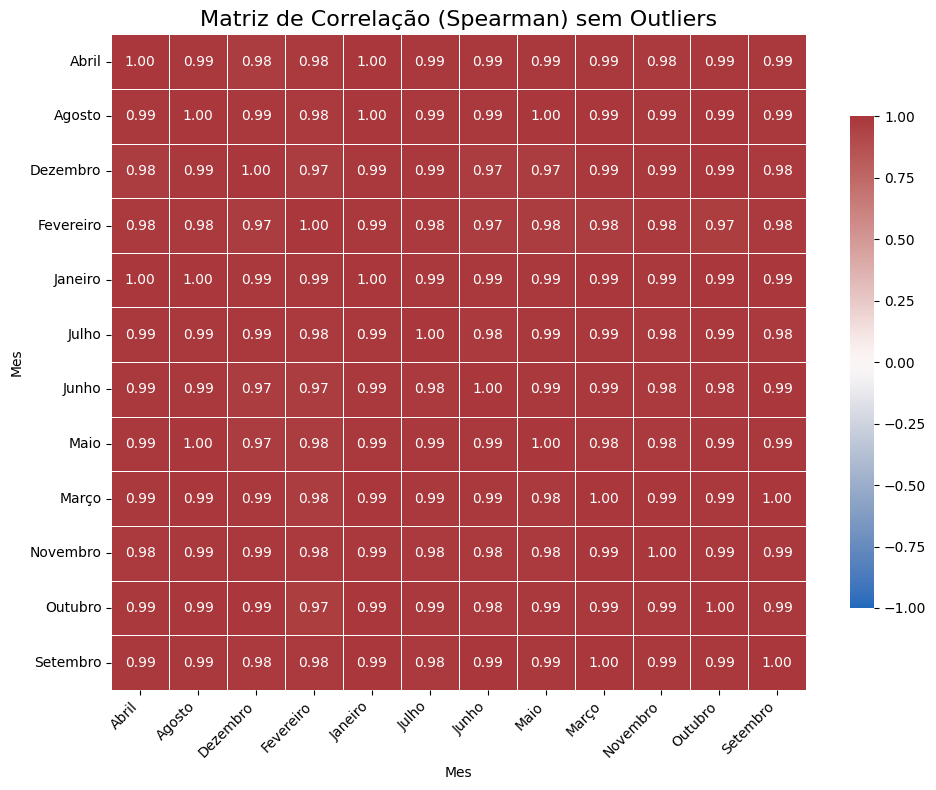


Matriz Num√©rica de Correla√ß√£o (sem outliers):
Mes        Abril  Agosto  Dezembro  Fevereiro  Janeiro  Julho  Junho   Maio  \
Mes                                                                           
Abril      1.000   0.991     0.976      0.980    0.996  0.988  0.989  0.991   
Agosto     0.991   1.000     0.987      0.980    0.997  0.988  0.991  0.995   
Dezembro   0.976   0.987     1.000      0.972    0.987  0.988  0.974  0.974   
Fevereiro  0.980   0.980     0.972      1.000    0.986  0.978  0.971  0.976   
Janeiro    0.996   0.997     0.987      0.986    1.000  0.990  0.990  0.991   
Julho      0.988   0.988     0.988      0.978    0.990  1.000  0.984  0.987   
Junho      0.989   0.991     0.974      0.971    0.990  0.984  1.000  0.991   
Maio       0.991   0.995     0.974      0.976    0.991  0.987  0.991  1.000   
Mar√ßo      0.990   0.992     0.987      0.976    0.994  0.985  0.991  0.984   
Novembro   0.980   0.992     0.991      0.978    0.989  0.982  0.984  0.982   
O

In [ ]:



# 1. Pivota o DataFrame para que os meses se tornem colunas
df_sem_outliers_pivoted = df_sem_outliers.pivot_table(index=['Ano', 'Municipio'], columns='Mes', values='Valor_Repassado')

# 2. Calcula a matriz de correla√ß√£o Spearman
matriz_correlacao_meses = df_sem_outliers_pivoted.corr(method='spearman')

# 3. Plota o mapa de calor da correla√ß√£o
plt.figure(figsize=(10, 8))
ax = sns.heatmap(matriz_correlacao_meses,
                 annot=True,
                 cmap='vlag',
                 fmt=".2f",
                 linewidths=.5,
                 cbar_kws={"shrink": .75},
                 vmin=-1,
                 vmax=1)
plt.title('Matriz de Correla√ß√£o (Spearman) sem Outliers', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Opcional: Imprime a matriz num√©rica de correla√ß√£o
print("\nMatriz Num√©rica de Correla√ß√£o (sem outliers):")
print(matriz_correlacao_meses.round(3))



Interpreta√ß√£o do Segundo Gr√°fico (sem outliers)

Tend√™ncia: A tend√™ncia geral √© a mesma, com um crescimento inicial, uma queda e uma recupera√ß√£o. No entanto, o pico em 2014 e a recupera√ß√£o a partir de 2017 est√£o mais suavizados e a curva de crescimento parece mais uniforme.

Sazonalidade: A sazonalidade continua presente e √© muito clara. A principal diferen√ßa √© que a escala do eixo Y (coeficiente de sazonalidade) √© um pouco menor. Isso mostra que, embora a sazonalidade seja importante, a remo√ß√£o dos outliers a torna proporcionalmente menos dominante em rela√ß√£o aos outros componentes da s√©rie.

Res√≠duo: Este √© o gr√°fico mais importante para compara√ß√£o. A nuvem de pontos est√° muito mais concentrada em torno da linha zero, sem picos extremos como no primeiro gr√°fico. Isso indica que a maior parte da varia√ß√£o na s√©rie √© explicada pela tend√™ncia e sazonalidade, e os dados agora s√£o muito mais consistentes.

A remo√ß√£o dos outliers teve um efeito positivo na  an√°lise. A tend√™ncia e a sazonalidade se tornaram mais claras e a variabilidade nos res√≠duos foi significativamente reduzida. Isso valida a  decis√£o de limpar os dados. O segundo gr√°fico, sem outliers, √© uma representa√ß√£o mais confi√°vel e precisa do comportamento dos repasses mensais.

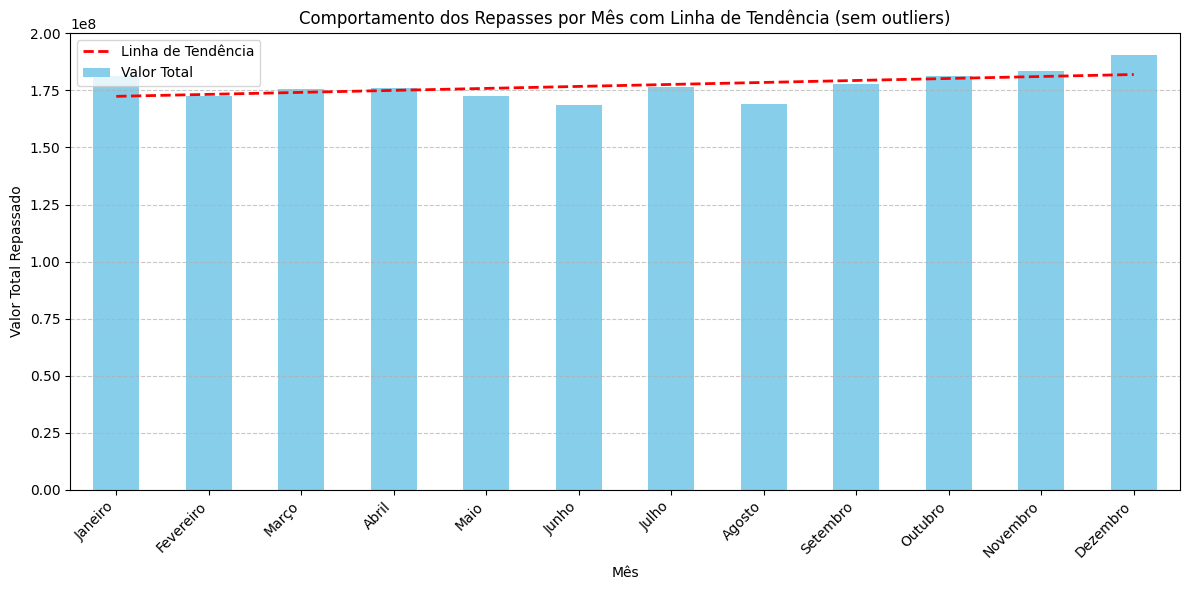


Equa√ß√£o da linha de tend√™ncia: y = 869439.59x + 172393352.61


In [ ]:


# 1. Agrupa os dados pela nova coluna 'Mes' e soma os valores
# A CORRE√á√ÉO EST√Å AQUI: usando df_sem_outliers
comportamento_mensal = df_sem_outliers.groupby('Mes')['Valor_Repassado'].sum()

# 2. Reordena os meses
meses_ordenados = ['Janeiro', 'Fevereiro', 'Mar√ßo', 'Abril', 'Maio', 'Junho',
                   'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
comportamento_mensal = comportamento_mensal.reindex(meses_ordenados)

# 3. Calcula a linha de tend√™ncia
x = np.arange(len(comportamento_mensal))
y = comportamento_mensal.values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# 4. Gera o gr√°fico de barras com a linha de tend√™ncia
plt.figure(figsize=(12, 6))
comportamento_mensal.plot(kind='bar', color='skyblue', label='Valor Total')
plt.plot(x, p(x), "r--", linewidth=2, label='Linha de Tend√™ncia')
plt.title('Comportamento dos Repasses por M√™s com Linha de Tend√™ncia (sem outliers)')
plt.xlabel('M√™s')
plt.ylabel('Valor Total Repassado')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

print("\nEqua√ß√£o da linha de tend√™ncia: y = {:.2f}x + {:.2f}".format(z[0], z[1]))

Valores Mais Realistas: O gr√°fico sem outliers mostra valores de repasse total por m√™s que s√£o mais consistentes e representativos do comportamento m√©dio. As barras t√™m uma altura mais uniforme, indicando que a remo√ß√£o dos valores extremos resultou em uma vis√£o mais realista do volume de repasses mensais.

Linha de Tend√™ncia Mais Precisa: A linha de tend√™ncia neste gr√°fico reflete de forma mais precisa a dire√ß√£o real da sua s√©rie de dados, sem ser distorcida por eventos pontuais. Embora a tend√™ncia geral seja semelhante em ambos os gr√°ficos (um leve crescimento), o gr√°fico sem outliers oferece uma base mais s√≥lida para a an√°lise

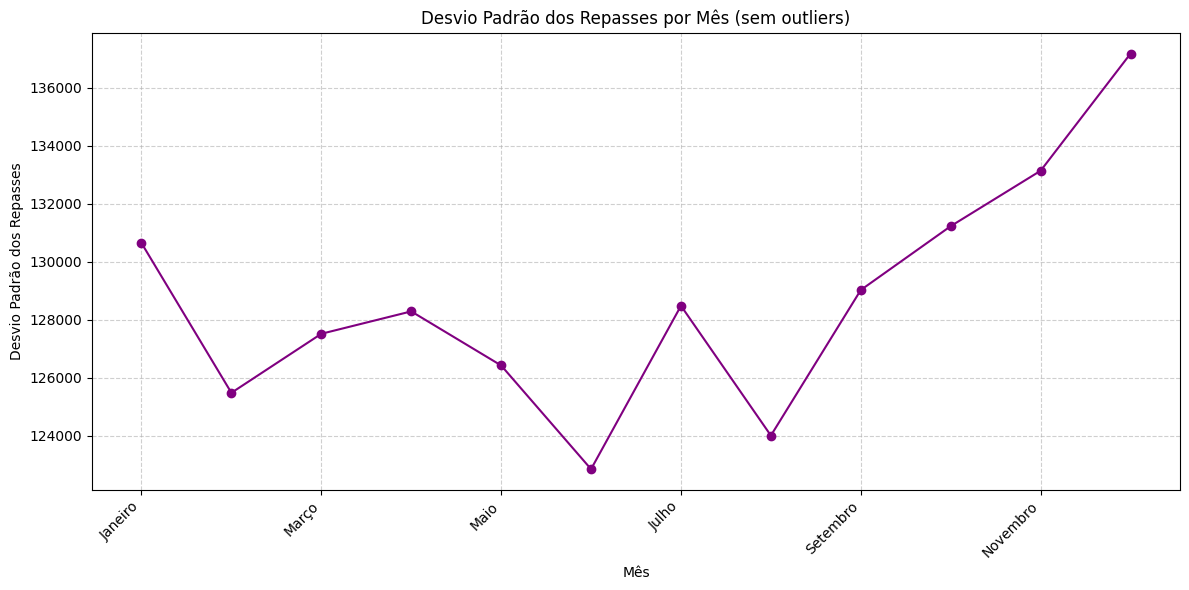


Desvio Padr√£o dos repasses por m√™s:
Mes
Janeiro      130641.830175
Fevereiro    125474.604124
Mar√ßo        127511.158126
Abril        128284.332318
Maio         126418.498353
Junho        122841.342964
Julho        128477.274813
Agosto       123999.975316
Setembro     129021.965758
Outubro      131224.894036
Novembro     133137.042402
Dezembro     137178.406308
Name: Valor_Repassado, dtype: float64


In [ ]:
# 1. Agrupa os dados pela nova coluna 'Mes' e calcula o desvio padr√£o
# A CORRE√á√ÉO EST√Å AQUI: usando df_sem_outliers
desvio_padrao_mensal = df_sem_outliers.groupby('Mes')['Valor_Repassado'].std()

# 2. Reordena os meses corretamente
meses_ordenados = ['Janeiro', 'Fevereiro', 'Mar√ßo', 'Abril', 'Maio', 'Junho',
                   'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
desvio_padrao_mensal = desvio_padrao_mensal.reindex(meses_ordenados)

# 3. Gera o gr√°fico de linha
plt.figure(figsize=(12, 6))
desvio_padrao_mensal.plot(kind='line', marker='o', color='purple', linestyle='-')
plt.title('Desvio Padr√£o dos Repasses por M√™s (sem outliers)')
plt.xlabel('M√™s')
plt.ylabel('Desvio Padr√£o dos Repasses')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. Opcional: Exibe os valores calculados
print("\nDesvio Padr√£o dos repasses por m√™s:")
print(desvio_padrao_mensal)

 No gr√°fico sem outliers, a linha do desvio padr√£o √© muito mais suave e consistente. A escala do eixo Y √© significativamente menor, mostrando que a varia√ß√£o real entre os repasses mensais √© muito mais baixa do que o primeiro gr√°fico sugeria.

**Esse c√≥digo realiza uma an√°lise e visualiza√ß√£o dos repasses por munic√≠pio ap√≥s a remo√ß√£o de outliers - 10 mais**

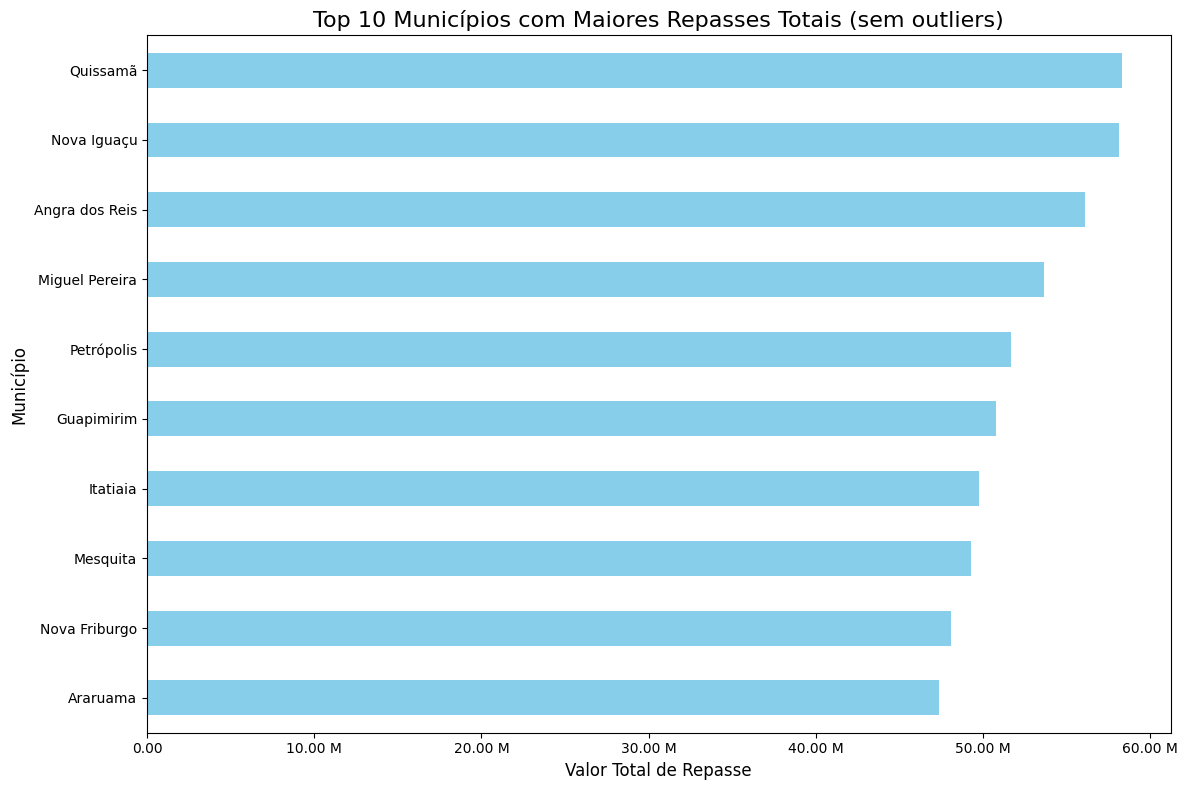

--- Top 5 Munic√≠pios com Maiores Repasses (sem outliers) ---
Municipio
Quissam√£          R$ 58.30 M
Nova Igua√ßu       R$ 58.13 M
Angra dos Reis    R$ 56.08 M
Miguel Pereira    R$ 53.62 M
Petr√≥polis        R$ 51.66 M
Name: Valor_Repassado, dtype: object

--- Top 5 Munic√≠pios com Menores Repasses (sem outliers) ---
Municipio
S√£o Francisco de Itabapoana    R$ 2.46 M
Bom Jesus do Itabapoana        R$ 2.82 M
Varre-Sai                      R$ 2.86 M
Italva                         R$ 3.33 M
Itaperuna                      R$ 4.16 M
Name: Valor_Repassado, dtype: object


In [ ]:


# 1. Agrupa os dados por Munic√≠pio e calcula o total de repasse
repasse_por_municipio = df_sem_outliers.groupby('Municipio')['Valor_Repassado'].sum()

# 2. Ordena os valores para encontrar os maiores e menores
top_10_municipios = repasse_por_municipio.nlargest(10)
bottom_5_municipios = repasse_por_municipio.nsmallest(5)

# 3. Gera o gr√°fico de barras para os 10 maiores
plt.figure(figsize=(12, 8))
top_10_municipios.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Top 10 Munic√≠pios com Maiores Repasses Totais (sem outliers)', fontsize=16)
plt.xlabel('Valor Total de Repasse', fontsize=12)
plt.ylabel('Munic√≠pio', fontsize=12)

# Formata o eixo X para exibir em bilh√µes
def format_values(x, pos):
    if x >= 1_000_000_000:
        return f'{x / 1_000_000_000:.2f} B'
    elif x >= 1_000_000:
        return f'{x / 1_000_000:.2f} M'
    else:
        return f'{x:,.2f}'

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_values))
plt.tight_layout()
plt.show()

# 4. Imprime as tabelas com a nova formata√ß√£o
print("--- Top 5 Munic√≠pios com Maiores Repasses (sem outliers) ---")
print(top_10_municipios.nlargest(5).apply(lambda x: f"R$ {format_values(x, None)}"))

print("\n--- Top 5 Munic√≠pios com Menores Repasses (sem outliers) ---")
print(bottom_5_municipios.apply(lambda x: f"R$ {format_values(x, None)}"))

In [ ]:
!jupyter nbconvert --to html /content/previsaÃÉo_2026.ipynb

[NbConvertApp] WARNING | pattern '/content/previsaÃÉo_2026.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]


## Explicar An√°lise Municipal (com e sem Outliers)

### Subtask:
Gerar markdown explicando a an√°lise dos repasses por munic√≠pio, incluindo a compara√ß√£o dos resultados com e sem outliers.

In [ ]:
%%markdown
Este trecho de c√≥digo analisa e visualiza os repasses por munic√≠pio, focando nos maiores e menores valores. Ele √© apresentado aqui para que voc√™ possa comparar os resultados antes e depois da remo√ß√£o dos outliers.

**An√°lise Municipal (com Outliers)**

1.  **Agrupamento e Soma por Munic√≠pio (com Outliers)**:
    *   `repasse_por_municipio = df_melted.groupby('Municipio')['Valor_Repassado'].sum()`: Agrupa o DataFrame original `df_melted` por 'Munic√≠pio' e soma o 'Valor_Repassado' para cada munic√≠pio. **Esta soma ainda inclui a influ√™ncia dos outliers.**

2.  **Identifica√ß√£o dos Maiores e Menores (com Outliers)**:
    *   `top_10_municipios = repasse_por_municipio.nlargest(10)`: Seleciona os 10 munic√≠pios com os maiores totais de repasse.
    *   `bottom_5_municipios = repasse_por_municipio.nsmallest(5)`: Seleciona os 5 munic√≠pios com os menores totais de repasse.

3.  **Gera√ß√£o do Gr√°fico (com Outliers)**:
    *   O c√≥digo gera um gr√°fico de barras horizontais mostrando os Top 10 munic√≠pios com maiores repasses. O t√≠tulo indica "Top 10 Munic√≠pios com Maiores Repasses Totais". **A altura das barras neste gr√°fico √© influenciada pelos outliers.**

4.  **Impress√£o das Tabelas (com Outliers)**:
    *   Imprime as tabelas dos Top 5 maiores e Top 5 menores munic√≠pios, formatando os valores em Bilh√µes de R$. **Estes valores tamb√©m incluem a influ√™ncia dos outliers.**

**Impacto dos Outliers na An√°lise Municipal (Compara√ß√£o)**

Agora, compare os resultados acima com a an√°lise municipal realizada **sem os outliers** (que foi gerada em uma c√©lula de c√≥digo posterior no seu notebook):

*   **Gr√°fico Top 10 (sem Outliers)**: Voc√™ deve notar que o gr√°fico "Top 10 Munic√≠pios com Maiores Repasses Totais (sem outliers)" (gerado posteriormente) provavelmente apresenta barras com alturas mais realistas e uma distribui√ß√£o menos distorcida. Os munic√≠pios que tinham picos de repasse devido a outliers podem ter sua posi√ß√£o no ranking alterada ou a diferen√ßa entre eles pode diminuir.
*   **Tabelas Top 5 Maiores/Menores (sem Outliers)**: As tabelas de Top 5 maiores e menores repasses (sem outliers) mostram os valores de repasse total para esses munic√≠pios ap√≥s a remo√ß√£o dos valores extremos. Voc√™ provavelmente ver√° valores totais de repasse menores para alguns munic√≠pios no ranking dos maiores, e a diferen√ßa entre os maiores e menores pode ser menos acentuada.

**Conclus√£o da Compara√ß√£o Municipal:**

A compara√ß√£o entre a an√°lise municipal com e sem outliers demonstra como os valores extremos podem inflar artificialmente os totais de repasse para determinados munic√≠pios. A an√°lise sem outliers fornece uma vis√£o mais precisa e confi√°vel do volume t√≠pico de repasses que cada munic√≠pio recebe ao longo do per√≠odo analisado, permitindo uma compara√ß√£o mais justa entre eles.

---

Este c√≥digo realiza a mesma an√°lise de repasses por munic√≠pio, mas utilizando o DataFrame **sem outliers** (`df_sem_outliers`).

1.  **Agrupamento e Soma por Munic√≠pio (sem Outliers)**:
    *   `repasse_por_municipio = df_sem_outliers.groupby('Municipio')['Valor_Repassado'].sum()`: Agrupa o DataFrame **`df_sem_outliers`** (o DataFrame limpo) por 'Munic√≠pio' e soma o 'Valor_Repassado'. **Esta soma agora reflete os totais de repasse sem a distor√ß√£o causada pelos valores extremos.**

2.  **Identifica√ß√£o dos Maiores e Menores (sem Outliers)**:
    *   `top_10_municipios = repasse_por_municipio.nlargest(10)`: Seleciona os 10 munic√≠pios com os maiores totais de repasse do DataFrame limpo.
    *   `bottom_5_municipios = repasse_por_municipio.nsmallest(5)`: Seleciona os 5 munic√≠pios com os menores totais de repasse do DataFrame limpo.

3.  **Gera√ß√£o do Gr√°fico (sem Outliers)**:
    *   O c√≥digo gera um gr√°fico de barras horizontais para os Top 10 munic√≠pios. O t√≠tulo "Top 10 Munic√≠pios com Maiores Repasses Totais (sem outliers)" indica que esta an√°lise foi feita no conjunto de dados limpo. **Este gr√°fico oferece uma visualiza√ß√£o mais precisa da distribui√ß√£o dos repasses entre os principais munic√≠pios, sem a distor√ß√£o dos outliers.**
    *   A fun√ß√£o `format_values` √© definida e aplicada ao eixo X (`plt.gca().xaxis.set_major_formatter`) para formatar os valores em Bilh√µes (B) ou Milh√µes (M), melhorando a legibilidade para valores grandes.

4.  **Impress√£o das Tabelas (sem Outliers)**:
    *   Imprime as tabelas dos Top 5 maiores e Top 5 menores munic√≠pios, utilizando a mesma fun√ß√£o `format_values` para formatar os n√∫meros. **Estes valores s√£o os totais de repasse ap√≥s a remo√ß√£o dos outliers.**

Esta an√°lise municipal sem outliers fornece uma base mais s√≥lida para entender quais munic√≠pios s√£o historicamente os maiores e menores benefici√°rios de repasses, pois os resultados n√£o s√£o inflados por eventos pontuais extremos. √â a an√°lise mais confi√°vel para comparar o desempenho t√≠pico dos munic√≠pios em termos de recebimento de repasses.

Este trecho de c√≥digo analisa e visualiza os repasses por munic√≠pio, focando nos maiores e menores valores. Ele √© apresentado aqui para que voc√™ possa comparar os resultados antes e depois da remo√ß√£o dos outliers.

**An√°lise Municipal (com Outliers)**

1.  **Agrupamento e Soma por Munic√≠pio (com Outliers)**:
    *   `repasse_por_municipio = df_melted.groupby('Municipio')['Valor_Repassado'].sum()`: Agrupa o DataFrame original `df_melted` por 'Munic√≠pio' e soma o 'Valor_Repassado' para cada munic√≠pio. **Esta soma ainda inclui a influ√™ncia dos outliers.**

2.  **Identifica√ß√£o dos Maiores e Menores (com Outliers)**:
    *   `top_10_municipios = repasse_por_municipio.nlargest(10)`: Seleciona os 10 munic√≠pios com os maiores totais de repasse.
    *   `bottom_5_municipios = repasse_por_municipio.nsmallest(5)`: Seleciona os 5 munic√≠pios com os menores totais de repasse.

3.  **Gera√ß√£o do Gr√°fico (com Outliers)**:
    *   O c√≥digo gera um gr√°fico de barras horizontais mostrando os Top 10 munic√≠pios com maiores repasses. O t√≠tulo indica "Top 10 Munic√≠pios com Maiores Repasses Totais". **A altura das barras neste gr√°fico √© influenciada pelos outliers.**

4.  **Impress√£o das Tabelas (com Outliers)**:
    *   Imprime as tabelas dos Top 5 maiores e Top 5 menores munic√≠pios, formatando os valores em Bilh√µes de R$. **Estes valores tamb√©m incluem a influ√™ncia dos outliers.**

**Impacto dos Outliers na An√°lise Municipal (Compara√ß√£o)**

Agora, compare os resultados acima com a an√°lise municipal realizada **sem os outliers** (que foi gerada em uma c√©lula de c√≥digo posterior no seu notebook):

*   **Gr√°fico Top 10 (sem Outliers)**: Voc√™ deve notar que o gr√°fico "Top 10 Munic√≠pios com Maiores Repasses Totais (sem outliers)" (gerado posteriormente) provavelmente apresenta barras com alturas mais realistas e uma distribui√ß√£o menos distorcida. Os munic√≠pios que tinham picos de repasse devido a outliers podem ter sua posi√ß√£o no ranking alterada ou a diferen√ßa entre eles pode diminuir.
*   **Tabelas Top 5 Maiores/Menores (sem Outliers)**: As tabelas de Top 5 maiores e menores repasses (sem outliers) mostram os valores de repasse total para esses munic√≠pios ap√≥s a remo√ß√£o dos valores extremos. Voc√™ provavelmente ver√° valores totais de repasse menores para alguns munic√≠pios no ranking dos maiores, e a diferen√ßa entre os maiores e menores pode ser menos acentuada.

**Conclus√£o da Compara√ß√£o Municipal:**

A compara√ß√£o entre a an√°lise municipal com e sem outliers demonstra como os valores extremos podem inflar artificialmente os totais de repasse para determinados munic√≠pios. A an√°lise sem outliers fornece uma vis√£o mais precisa e confi√°vel do volume t√≠pico de repasses que cada munic√≠pio recebe ao longo do per√≠odo analisado, permitindo uma compara√ß√£o mais justa entre eles.

---

Este c√≥digo realiza a mesma an√°lise de repasses por munic√≠pio, mas utilizando o DataFrame **sem outliers** (`df_sem_outliers`).

1.  **Agrupamento e Soma por Munic√≠pio (sem Outliers)**:
    *   `repasse_por_municipio = df_sem_outliers.groupby('Municipio')['Valor_Repassado'].sum()`: Agrupa o DataFrame **`df_sem_outliers`** (o DataFrame limpo) por 'Munic√≠pio' e soma o 'Valor_Repassado'. **Esta soma agora reflete os totais de repasse sem a distor√ß√£o causada pelos valores extremos.**

2.  **Identifica√ß√£o dos Maiores e Menores (sem Outliers)**:
    *   `top_10_municipios = repasse_por_municipio.nlargest(10)`: Seleciona os 10 munic√≠pios com os maiores totais de repasse do DataFrame limpo.
    *   `bottom_5_municipios = repasse_por_municipio.nsmallest(5)`: Seleciona os 5 munic√≠pios com os menores totais de repasse do DataFrame limpo.

3.  **Gera√ß√£o do Gr√°fico (sem Outliers)**:
    *   O c√≥digo gera um gr√°fico de barras horizontais para os Top 10 munic√≠pios. O t√≠tulo "Top 10 Munic√≠pios com Maiores Repasses Totais (sem outliers)" indica que esta an√°lise foi feita no conjunto de dados limpo. **Este gr√°fico oferece uma visualiza√ß√£o mais precisa da distribui√ß√£o dos repasses entre os principais munic√≠pios, sem a distor√ß√£o dos outliers.**
    *   A fun√ß√£o `format_values` √© definida e aplicada ao eixo X (`plt.gca().xaxis.set_major_formatter`) para formatar os valores em Bilh√µes (B) ou Milh√µes (M), melhorando a legibilidade para valores grandes.

4.  **Impress√£o das Tabelas (sem Outliers)**:
    *   Imprime as tabelas dos Top 5 maiores e Top 5 menores munic√≠pios, utilizando a mesma fun√ß√£o `format_values` para formatar os n√∫meros. **Estes valores s√£o os totais de repasse ap√≥s a remo√ß√£o dos outliers.**

Esta an√°lise municipal sem outliers fornece uma base mais s√≥lida para entender quais munic√≠pios s√£o historicamente os maiores e menores benefici√°rios de repasses, pois os resultados n√£o s√£o inflados por eventos pontuais extremos. √â a an√°lise mais confi√°vel para comparar o desempenho t√≠pico dos munic√≠pios em termos de recebimento de repasses.


## Explicar An√°lise de Tend√™ncia (sem Outliers)

### Subtask:
Gerar markdown explicando o c√°lculo e plotagem da linha de tend√™ncia sem outliers.

In [ ]:
%%markdown
Este c√≥digo analisa a tend√™ncia geral dos repasses mensais ao longo dos anos **ap√≥s a remo√ß√£o dos outliers**. A an√°lise da tend√™ncia sem a influ√™ncia de valores extremos fornece uma vis√£o mais clara e precisa da dire√ß√£o de longo prazo da s√©rie temporal.

1.  **Agrupamento e Soma dos Valores (sem Outliers)**:
    *   `comportamento_mensal = df_sem_outliers.groupby('Mes')['Valor_Repassado'].sum()`: Esta linha agrupa o DataFrame **`df_sem_outliers`** (o DataFrame limpo, sem os outliers) pela coluna `'Mes'` e soma o `'Valor_Repassado'` para cada m√™s. Isso nos d√° o total de repasse para cada m√™s, acumulado ao longo de todos os anos, mas agora sem a distor√ß√£o causada pelos valores extremos.

2.  **Reordena√ß√£o dos Meses**:
    *   `meses_ordenados = ['Janeiro', 'Fevereiro', 'Mar√ßo', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']`: Define a ordem cronol√≥gica dos meses.
    *   `comportamento_mensal = comportamento_mensal.reindex(meses_ordenados)`: Reorganiza os totais mensais na ordem correta para a visualiza√ß√£o e c√°lculo da linha de tend√™ncia.

3.  **C√°lculo da Linha de Tend√™ncia**:
    *   `x = np.arange(len(comportamento_mensal))`: Cria um array num√©rico `x` representando a sequ√™ncia dos meses (0, 1, ..., 11).
    *   `y = comportamento_mensal.values`: Extrai os valores totais de repasse (sem outliers) em um array `y`.
    *   `z = np.polyfit(x, y, 1)`: Calcula os coeficientes (`z`) de uma linha reta (polin√¥mio de grau 1) que melhor se ajusta aos pontos `(x, y)`.
    *   `p = np.poly1d(z)`: Cria uma fun√ß√£o polinomial `p` a partir dos coeficientes `z`, que pode ser usada para calcular os valores da linha de tend√™ncia.

4.  **Gera√ß√£o do Gr√°fico de Barras com Linha de Tend√™ncia**:
    *   `plt.figure(figsize=(12, 6))`: Cria a figura para o gr√°fico.
    *   `comportamento_mensal.plot(kind='bar', color='skyblue', label='Valor Total')`: Desenha o gr√°fico de barras dos totais mensais (sem outliers).
    *   `plt.plot(x, p(x), "r--", linewidth=2, label='Linha de Tend√™ncia')`: Desenha a linha de tend√™ncia calculada sobre o gr√°fico de barras.
    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Define o t√≠tulo e os r√≥tulos dos eixos. O t√≠tulo indica que o gr√°fico √© "sem outliers".
    *   `plt.xticks(rotation=45, ha='right')`: Rotaciona os r√≥tulos do eixo X.
    *   `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adiciona linhas de grade horizontais.
    *   `plt.tight_layout()`: Ajusta o layout.
    *   `plt.legend()`: Exibe a legenda.
    *   `plt.show()`: Exibe o gr√°fico.

**Compara√ß√£o com o Gr√°fico de Tend√™ncia com Outliers:**
Ao comparar este gr√°fico com o gr√°fico de tend√™ncia que inclu√≠a outliers, voc√™ deve notar que a linha de tend√™ncia neste gr√°fico (sem outliers) √© uma representa√ß√£o mais fiel do comportamento t√≠pico dos repasses mensais. Ela n√£o √© "puxada" para cima por picos extremos, oferecendo uma vis√£o mais suave e representativa da dire√ß√£o geral dos repasses ao longo do ano.

5.  **Impress√£o da Equa√ß√£o da Linha de Tend√™ncia**:
    *   `print("\nEqua√ß√£o da linha de tend√™ncia: y = {:.2f}x + {:.2f}".format(z[0], z[1]))`: Imprime a equa√ß√£o da linha de tend√™ncia ajustada (y = ax + b), mostrando a inclina√ß√£o (`z[0]`) e o intercepto (`z[1]`). Esta equa√ß√£o descreve matematicamente a linha de tend√™ncia dos totais de repasse mensais sem a influ√™ncia dos outliers.

Este c√≥digo analisa a tend√™ncia geral dos repasses mensais ao longo dos anos **ap√≥s a remo√ß√£o dos outliers**. A an√°lise da tend√™ncia sem a influ√™ncia de valores extremos fornece uma vis√£o mais clara e precisa da dire√ß√£o de longo prazo da s√©rie temporal.

1.  **Agrupamento e Soma dos Valores (sem Outliers)**:
    *   `comportamento_mensal = df_sem_outliers.groupby('Mes')['Valor_Repassado'].sum()`: Esta linha agrupa o DataFrame **`df_sem_outliers`** (o DataFrame limpo, sem os outliers) pela coluna `'Mes'` e soma o `'Valor_Repassado'` para cada m√™s. Isso nos d√° o total de repasse para cada m√™s, acumulado ao longo de todos os anos, mas agora sem a distor√ß√£o causada pelos valores extremos.

2.  **Reordena√ß√£o dos Meses**:
    *   `meses_ordenados = ['Janeiro', 'Fevereiro', 'Mar√ßo', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']`: Define a ordem cronol√≥gica dos meses.
    *   `comportamento_mensal = comportamento_mensal.reindex(meses_ordenados)`: Reorganiza os totais mensais na ordem correta para a visualiza√ß√£o e c√°lculo da linha de tend√™ncia.

3.  **C√°lculo da Linha de Tend√™ncia**:
    *   `x = np.arange(len(comportamento_mensal))`: Cria um array num√©rico `x` representando a sequ√™ncia dos meses (0, 1, ..., 11).
    *   `y = comportamento_mensal.values`: Extrai os valores totais de repasse (sem outliers) em um array `y`.
    *   `z = np.polyfit(x, y, 1)`: Calcula os coeficientes (`z`) de uma linha reta (polin√¥mio de grau 1) que melhor se ajusta aos pontos `(x, y)`.
    *   `p = np.poly1d(z)`: Cria uma fun√ß√£o polinomial `p` a partir dos coeficientes `z`, que pode ser usada para calcular os valores da linha de tend√™ncia.

4.  **Gera√ß√£o do Gr√°fico de Barras com Linha de Tend√™ncia**:
    *   `plt.figure(figsize=(12, 6))`: Cria a figura para o gr√°fico.
    *   `comportamento_mensal.plot(kind='bar', color='skyblue', label='Valor Total')`: Desenha o gr√°fico de barras dos totais mensais (sem outliers).
    *   `plt.plot(x, p(x), "r--", linewidth=2, label='Linha de Tend√™ncia')`: Desenha a linha de tend√™ncia calculada sobre o gr√°fico de barras.
    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Define o t√≠tulo e os r√≥tulos dos eixos. O t√≠tulo indica que o gr√°fico √© "sem outliers".
    *   `plt.xticks(rotation=45, ha='right')`: Rotaciona os r√≥tulos do eixo X.
    *   `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adiciona linhas de grade horizontais.
    *   `plt.tight_layout()`: Ajusta o layout.
    *   `plt.legend()`: Exibe a legenda.
    *   `plt.show()`: Exibe o gr√°fico.

**Compara√ß√£o com o Gr√°fico de Tend√™ncia com Outliers:**
Ao comparar este gr√°fico com o gr√°fico de tend√™ncia que inclu√≠a outliers, voc√™ deve notar que a linha de tend√™ncia neste gr√°fico (sem outliers) √© uma representa√ß√£o mais fiel do comportamento t√≠pico dos repasses mensais. Ela n√£o √© "puxada" para cima por picos extremos, oferecendo uma vis√£o mais suave e representativa da dire√ß√£o geral dos repasses ao longo do ano.

5.  **Impress√£o da Equa√ß√£o da Linha de Tend√™ncia**:
    *   `print("\nEqua√ß√£o da linha de tend√™ncia: y = {:.2f}x + {:.2f}".format(z[0], z[1]))`: Imprime a equa√ß√£o da linha de tend√™ncia ajustada (y = ax + b), mostrando a inclina√ß√£o (`z[0]`) e o intercepto (`z[1]`). Esta equa√ß√£o descreve matematicamente a linha de tend√™ncia dos totais de repasse mensais sem a influ√™ncia dos outliers.


## Explicar An√°lise de Autocorrela√ß√£o (sem Outliers)

### Subtask:
Gerar markdown explicando o gr√°fico ACF e a correla√ß√£o de Lag 1 sem outliers.

In [ ]:
%%markdown
Este c√≥digo visualiza a **Autocorrela√ß√£o** dos repasses mensais **ap√≥s a remo√ß√£o dos outliers**. Assim como na an√°lise anterior, a autocorrela√ß√£o mede a rela√ß√£o entre a s√©rie temporal e suas vers√µes defasadas no tempo, mas agora a an√°lise √© mais precisa por n√£o ser distorcida por valores extremos.

1.  **Cria√ß√£o da S√©rie Temporal (sem Outliers)**:
    *   `serie_temporal = df_sem_outliers.groupby('Data')['Valor_Repassado'].sum()`: Agrupa o DataFrame `df_sem_outliers` (o DataFrame limpo) pela coluna 'Data' e soma os `'Valor_Repassado'`. Isso cria a s√©rie temporal de repasses mensais sem a influ√™ncia dos outliers.

2.  **Gera√ß√£o do Gr√°fico de Autocorrela√ß√£o (ACF)**:
    *   `plt.figure(figsize=(10, 6))`: Cria uma figura para o gr√°fico.
    *   `plot_acf(serie_temporal, lags=24)`: Calcula e plota a Fun√ß√£o de Autocorrela√ß√£o (ACF) para a s√©rie temporal sem outliers. `lags=24` exibe a correla√ß√£o com at√© 2 anos de defasagem.

    *   **Interpreta√ß√£o do Gr√°fico ACF (sem Outliers):**
        *   As **barras azuis** ainda indicam a for√ßa da correla√ß√£o para cada defasagem.
        *   A **banda de confian√ßa** (√°rea azul sombreada) ainda mostra os limites para signific√¢ncia estat√≠stica.
        *   **Decaimento das Barras:** Voc√™ deve observar um **decaimento mais suave e claro** das barras nos primeiros lags em compara√ß√£o com o gr√°fico com outliers. Isso ainda indica a presen√ßa de uma tend√™ncia, mas a visualiza√ß√£o n√£o est√° sendo t√£o abruptamente influenciada pelos valores extremos. O decaimento mais limpo permite uma melhor avalia√ß√£o da persist√™ncia da s√©rie.
        *   **Picos em Lags Sazonais:** Se a sazonalidade anual for um fator importante, voc√™ ainda ver√° picos significativos nos lags 12, 24, etc., possivelmente mais n√≠tidos agora que os outliers foram removidos.

    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`, `plt.grid(True)`: Define o t√≠tulo, r√≥tulos e grade. O t√≠tulo indica que o gr√°fico √© "sem outliers".
    *   `plt.show()`: Exibe o gr√°fico.

**Compara√ß√£o com o Gr√°fico ACF com Outliers:**
A principal diferen√ßa esperada neste gr√°fico (sem outliers) √© que os coeficientes de autocorrela√ß√£o, especialmente nos primeiros lags, ser√£o provavelmente menores ou mais est√°veis, refletindo a rela√ß√£o t√≠pica entre os meses sem a distor√ß√£o causada pelos valores extremos. O decaimento da autocorrela√ß√£o que indica a tend√™ncia deve ser mais uniforme.

3.  **C√°lculo e Impress√£o da Autocorrela√ß√£o no Lag 1**:
    *   `autocorr_lag1 = serie_temporal.autocorr(lag=1)`: Calcula o coeficiente de autocorrela√ß√£o para a defasagem de 1 m√™s (Lag 1) na s√©rie sem outliers.
    *   `print(f"\nCorrela√ß√£o entre um m√™s e o pr√≥ximo (Lag 1): {autocorr_lag1:.2f}")`: Imprime o valor calculado.

Este valor de autocorrela√ß√£o no Lag 1 (sem outliers) fornece uma medida mais robusta da correla√ß√£o entre um m√™s e o m√™s seguinte, representando a depend√™ncia temporal t√≠pica da s√©rie. Compar√°-lo com o valor do Lag 1 com outliers demonstra o quanto os valores extremos podem inflar ou distorcer essa m√©trica.

Este c√≥digo visualiza a **Autocorrela√ß√£o** dos repasses mensais **ap√≥s a remo√ß√£o dos outliers**. Assim como na an√°lise anterior, a autocorrela√ß√£o mede a rela√ß√£o entre a s√©rie temporal e suas vers√µes defasadas no tempo, mas agora a an√°lise √© mais precisa por n√£o ser distorcida por valores extremos.

1.  **Cria√ß√£o da S√©rie Temporal (sem Outliers)**:
    *   `serie_temporal = df_sem_outliers.groupby('Data')['Valor_Repassado'].sum()`: Agrupa o DataFrame `df_sem_outliers` (o DataFrame limpo) pela coluna 'Data' e soma os `'Valor_Repassado'`. Isso cria a s√©rie temporal de repasses mensais sem a influ√™ncia dos outliers.

2.  **Gera√ß√£o do Gr√°fico de Autocorrela√ß√£o (ACF)**:
    *   `plt.figure(figsize=(10, 6))`: Cria uma figura para o gr√°fico.
    *   `plot_acf(serie_temporal, lags=24)`: Calcula e plota a Fun√ß√£o de Autocorrela√ß√£o (ACF) para a s√©rie temporal sem outliers. `lags=24` exibe a correla√ß√£o com at√© 2 anos de defasagem.

    *   **Interpreta√ß√£o do Gr√°fico ACF (sem Outliers):**
        *   As **barras azuis** ainda indicam a for√ßa da correla√ß√£o para cada defasagem.
        *   A **banda de confian√ßa** (√°rea azul sombreada) ainda mostra os limites para signific√¢ncia estat√≠stica.
        *   **Decaimento das Barras:** Voc√™ deve observar um **decaimento mais suave e claro** das barras nos primeiros lags em compara√ß√£o com o gr√°fico com outliers. Isso ainda indica a presen√ßa de uma tend√™ncia, mas a visualiza√ß√£o n√£o est√° sendo t√£o abruptamente influenciada pelos valores extremos. O decaimento mais limpo permite uma melhor avalia√ß√£o da persist√™ncia da s√©rie.
        *   **Picos em Lags Sazonais:** Se a sazonalidade anual for um fator importante, voc√™ ainda ver√° picos significativos nos lags 12, 24, etc., possivelmente mais n√≠tidos agora que os outliers foram removidos.

    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`, `plt.grid(True)`: Define o t√≠tulo, r√≥tulos e grade. O t√≠tulo indica que o gr√°fico √© "sem outliers".
    *   `plt.show()`: Exibe o gr√°fico.

**Compara√ß√£o com o Gr√°fico ACF com Outliers:**
A principal diferen√ßa esperada neste gr√°fico (sem outliers) √© que os coeficientes de autocorrela√ß√£o, especialmente nos primeiros lags, ser√£o provavelmente menores ou mais est√°veis, refletindo a rela√ß√£o t√≠pica entre os meses sem a distor√ß√£o causada pelos valores extremos. O decaimento da autocorrela√ß√£o que indica a tend√™ncia deve ser mais uniforme.

3.  **C√°lculo e Impress√£o da Autocorrela√ß√£o no Lag 1**:
    *   `autocorr_lag1 = serie_temporal.autocorr(lag=1)`: Calcula o coeficiente de autocorrela√ß√£o para a defasagem de 1 m√™s (Lag 1) na s√©rie sem outliers.
    *   `print(f"\nCorrela√ß√£o entre um m√™s e o pr√≥ximo (Lag 1): {autocorr_lag1:.2f}")`: Imprime o valor calculado.

Este valor de autocorrela√ß√£o no Lag 1 (sem outliers) fornece uma medida mais robusta da correla√ß√£o entre um m√™s e o m√™s seguinte, representando a depend√™ncia temporal t√≠pica da s√©rie. Compar√°-lo com o valor do Lag 1 com outliers demonstra o quanto os valores extremos podem inflar ou distorcer essa m√©trica.


## Explicar An√°lise de Decomposi√ß√£o de S√©rie Temporal (sem Outliers)

### Subtask:
Gerar markdown explicando a decomposi√ß√£o da s√©rie temporal sem outliers.

In [ ]:
%%markdown
Este c√≥digo realiza a **decomposi√ß√£o da s√©rie temporal** dos repasses mensais **ap√≥s a remo√ß√£o dos outliers**. A decomposi√ß√£o divide a s√©rie temporal em seus componentes principais: Tend√™ncia, Sazonalidade e Res√≠duo (aleatoriedade). Analisar esses componentes sem a distor√ß√£o dos outliers fornece uma vis√£o mais clara do comportamento subjacente dos dados.

**Import√¢ncia da Remo√ß√£o de Outliers para a Decomposi√ß√£o:**
Como visto na an√°lise anterior, os outliers podem inflar os valores e distorcer a percep√ß√£o da tend√™ncia e da sazonalidade. Ao remover os outliers, a decomposi√ß√£o se torna mais robusta e os componentes extra√≠dos refletem melhor o padr√£o t√≠pico da s√©rie temporal.

1.  **Cria√ß√£o da S√©rie Temporal (sem Outliers)**:
    *   `serie_temporal = df_sem_outliers.groupby('Data')['Valor_Repassado'].sum()`: Esta linha √© crucial. Ela agrupa o DataFrame **`df_sem_outliers`** (o DataFrame limpo, sem os outliers identificados) pela coluna 'Data' e soma os valores de 'Valor_Repassado' para cada m√™s/ano. Isso cria a s√©rie temporal que ser√° decomposta, garantindo que os valores extremos n√£o influenciem o resultado.

2.  **Realiza√ß√£o da Decomposi√ß√£o**:
    *   `decomposicao = seasonal_decompose(serie_temporal, model='additive', period=12)`: Aplica a fun√ß√£o `seasonal_decompose` √† `serie_temporal`.
        *   `model='additive'`: Especifica o modelo de decomposi√ß√£o como aditivo. Em um modelo aditivo, os componentes s√£o somados para formar a s√©rie original (S√©rie = Tend√™ncia + Sazonalidade + Res√≠duo). Isso √© apropriado quando a magnitude da sazonalidade e do res√≠duo n√£o muda significativamente com o n√≠vel da s√©rie.
        *   `period=12`: Define o per√≠odo da sazonalidade como 12, indicando que o padr√£o sazonal se repete a cada 12 meses (um ano).

3.  **Plotagem dos Resultados**:
    *   `decomposicao.plot()`: Plota os resultados da decomposi√ß√£o. Isso gera um gr√°fico com quatro subplots:
        *   **Original:** A s√©rie temporal original (sem outliers, neste caso).
        *   **Trend:** Mostra o componente de tend√™ncia, que √© a dire√ß√£o de longo prazo da s√©rie (crescimento, decaimento ou estabilidade).
        *   **Seasonal:** Mostra o componente sazonal, que s√£o os padr√µes que se repetem em intervalos regulares (neste caso, a cada 12 meses).
        *   **Residual:** Mostra o componente residual, que √© a parte da s√©rie que n√£o √© explicada pela tend√™ncia ou sazonalidade. Idealmente, o res√≠duo deve parecer ru√≠do aleat√≥rio.
    *   `plt.suptitle('Decomposi√ß√£o da S√©rie Temporal de Repasses Mensais (sem outliers)', y=1.02)`: Adiciona um t√≠tulo principal acima de todos os subplots, indicando claramente que esta decomposi√ß√£o foi realizada sem os outliers. O `y=1.02` ajusta a posi√ß√£o do t√≠tulo.
    *   `plt.show()`: Exibe o gr√°fico.

Ao analisar este gr√°fico de decomposi√ß√£o (sem outliers), voc√™ pode observar uma tend√™ncia mais suave, uma sazonalidade mais clara e consistente, e um res√≠duo que se concentra mais perto de zero, sem os picos extremos vistos na decomposi√ß√£o com outliers. Isso confirma o impacto positivo da remo√ß√£o de outliers na revela√ß√£o dos padr√µes reais da s√©rie temporal.

Este c√≥digo realiza a **decomposi√ß√£o da s√©rie temporal** dos repasses mensais **ap√≥s a remo√ß√£o dos outliers**. A decomposi√ß√£o divide a s√©rie temporal em seus componentes principais: Tend√™ncia, Sazonalidade e Res√≠duo (aleatoriedade). Analisar esses componentes sem a distor√ß√£o dos outliers fornece uma vis√£o mais clara do comportamento subjacente dos dados.

**Import√¢ncia da Remo√ß√£o de Outliers para a Decomposi√ß√£o:**
Como visto na an√°lise anterior, os outliers podem inflar os valores e distorcer a percep√ß√£o da tend√™ncia e da sazonalidade. Ao remover os outliers, a decomposi√ß√£o se torna mais robusta e os componentes extra√≠dos refletem melhor o padr√£o t√≠pico da s√©rie temporal.

1.  **Cria√ß√£o da S√©rie Temporal (sem Outliers)**:
    *   `serie_temporal = df_sem_outliers.groupby('Data')['Valor_Repassado'].sum()`: Esta linha √© crucial. Ela agrupa o DataFrame **`df_sem_outliers`** (o DataFrame limpo, sem os outliers identificados) pela coluna 'Data' e soma os valores de 'Valor_Repassado' para cada m√™s/ano. Isso cria a s√©rie temporal que ser√° decomposta, garantindo que os valores extremos n√£o influenciem o resultado.

2.  **Realiza√ß√£o da Decomposi√ß√£o**:
    *   `decomposicao = seasonal_decompose(serie_temporal, model='additive', period=12)`: Aplica a fun√ß√£o `seasonal_decompose` √† `serie_temporal`.
        *   `model='additive'`: Especifica o modelo de decomposi√ß√£o como aditivo. Em um modelo aditivo, os componentes s√£o somados para formar a s√©rie original (S√©rie = Tend√™ncia + Sazonalidade + Res√≠duo). Isso √© apropriado quando a magnitude da sazonalidade e do res√≠duo n√£o muda significativamente com o n√≠vel da s√©rie.
        *   `period=12`: Define o per√≠odo da sazonalidade como 12, indicando que o padr√£o sazonal se repete a cada 12 meses (um ano).

3.  **Plotagem dos Resultados**:
    *   `decomposicao.plot()`: Plota os resultados da decomposi√ß√£o. Isso gera um gr√°fico com quatro subplots:
        *   **Original:** A s√©rie temporal original (sem outliers, neste caso).
        *   **Trend:** Mostra o componente de tend√™ncia, que √© a dire√ß√£o de longo prazo da s√©rie (crescimento, decaimento ou estabilidade).
        *   **Seasonal:** Mostra o componente sazonal, que s√£o os padr√µes que se repetem em intervalos regulares (neste caso, a cada 12 meses).
        *   **Residual:** Mostra o componente residual, que √© a parte da s√©rie que n√£o √© explicada pela tend√™ncia ou sazonalidade. Idealmente, o res√≠duo deve parecer ru√≠do aleat√≥rio.
    *   `plt.suptitle('Decomposi√ß√£o da S√©rie Temporal de Repasses Mensais (sem outliers)', y=1.02)`: Adiciona um t√≠tulo principal acima de todos os subplots, indicando claramente que esta decomposi√ß√£o foi realizada sem os outliers. O `y=1.02` ajusta a posi√ß√£o do t√≠tulo.
    *   `plt.show()`: Exibe o gr√°fico.

Ao analisar este gr√°fico de decomposi√ß√£o (sem outliers), voc√™ pode observar uma tend√™ncia mais suave, uma sazonalidade mais clara e consistente, e um res√≠duo que se concentra mais perto de zero, sem os picos extremos vistos na decomposi√ß√£o com outliers. Isso confirma o impacto positivo da remo√ß√£o de outliers na revela√ß√£o dos padr√µes reais da s√©rie temporal.


# Task
Generate a script in Portuguese explaining the code in the notebook, covering data loading, cleaning, monthly behavior analysis, descriptive statistics, trend analysis, autocorrelation, outlier detection, analysis without outliers, and municipal analysis.

## Explicar carga de dados

### Subtask:
Gerar um markdown explicando como os dados foram carregados.


**Reasoning**:
Create a markdown cell and add the explanation for data loading as requested in the subtask instructions.



In [ ]:
%%markdown
Este trecho de c√≥digo √© respons√°vel por carregar os dados do arquivo Excel para an√°lise.

1.  **Importa√ß√£o de Bibliotecas**:
    *   `import pandas as pd`: Importa a biblioteca pandas, que √© fundamental para trabalhar com DataFrames (estruturas de dados tabulares) em Python.
    *   `from google.colab import drive`: Importa o m√≥dulo `drive` da biblioteca `google.colab`, necess√°rio para interagir com o Google Drive quando se est√° usando o Google Colab.

2.  **Montagem do Google Drive**:
    *   `drive.mount('/content/drive')`: Esta linha de c√≥digo monta o seu Google Drive no ambiente do Google Colab. Isso permite que o script Python acesse arquivos armazenados no seu Drive.

3.  **Leitura do Arquivo Excel**:
    *   `df = pd.read_excel('/content/drive/MyDrive/ICMSanalise/Consolidado repasse 2012 - 2025_estati.xlsx')`: Utiliza a fun√ß√£o `read_excel` do pandas para ler o arquivo localizado no caminho especificado dentro do seu Google Drive. Os dados do arquivo s√£o carregados em um DataFrame chamado `df`.

4.  **Exibi√ß√£o das Primeiras Linhas**:
    *   `print(df.head())`: Exibe as cinco primeiras linhas do DataFrame `df`. Isso √© feito para verificar se o arquivo foi lido corretamente e para ter uma pr√©via da estrutura dos dados.

Este trecho de c√≥digo √© respons√°vel por carregar os dados do arquivo Excel para an√°lise.

1.  **Importa√ß√£o de Bibliotecas**:
    *   `import pandas as pd`: Importa a biblioteca pandas, que √© fundamental para trabalhar com DataFrames (estruturas de dados tabulares) em Python.
    *   `from google.colab import drive`: Importa o m√≥dulo `drive` da biblioteca `google.colab`, necess√°rio para interagir com o Google Drive quando se est√° usando o Google Colab.

2.  **Montagem do Google Drive**:
    *   `drive.mount('/content/drive')`: Esta linha de c√≥digo monta o seu Google Drive no ambiente do Google Colab. Isso permite que o script Python acesse arquivos armazenados no seu Drive.

3.  **Leitura do Arquivo Excel**:
    *   `df = pd.read_excel('/content/drive/MyDrive/ICMSanalise/Consolidado repasse 2012 - 2025_estati.xlsx')`: Utiliza a fun√ß√£o `read_excel` do pandas para ler o arquivo localizado no caminho especificado dentro do seu Google Drive. Os dados do arquivo s√£o carregados em um DataFrame chamado `df`.

4.  **Exibi√ß√£o das Primeiras Linhas**:
    *   `print(df.head())`: Exibe as cinco primeiras linhas do DataFrame `df`. Isso √© feito para verificar se o arquivo foi lido corretamente e para ter uma pr√©via da estrutura dos dados.


## Explicar limpeza de dados

### Subtask:
Gerar markdowns explicando a remo√ß√£o do ano 2025 e o tratamento de valores nulos.


**Reasoning**:
Generate a markdown to explain the removal of the year 2025 from the DataFrame and the handling of null values, including replacing zeros with NaN and dropping rows.



In [ ]:
%%markdown
Este trecho de c√≥digo realiza duas etapas importantes de limpeza de dados: a remo√ß√£o do ano de 2025 e o tratamento de valores nulos e zeros.

**1. Remo√ß√£o do Ano 2025**

*   `df_filtrado = df[df['Ano'] != 2025]`: Esta linha de c√≥digo cria um **novo DataFrame** chamado `df_filtrado`. Ele seleciona todas as linhas do DataFrame original (`df`) onde o valor na coluna 'Ano' **n√£o √© igual a 2025**. O ano de 2025 foi removido da an√°lise porque, sendo um ano incompleto, poderia distorcer as an√°lises de comportamento anual ou sazonal.
*   `print(df_filtrado)`: (Opcional) Exibe o novo DataFrame `df_filtrado` para que voc√™ possa verificar se a filtragem foi aplicada corretamente e se o ano de 2025 n√£o est√° mais presente.

**2. Tratamento de Valores Nulos e Zeros**

*   `print('Quantidade de valores nulos por coluna:')`: Imprime uma mensagem informativa.
*   `print(df_filtrado.isnull().sum())`: Utiliza o m√©todo `isnull()` para identificar valores nulos em cada c√©lula do `df_filtrado` e `.sum()` para contar o total de valores nulos por coluna. Isso mostra a quantidade inicial de dados faltantes em cada coluna antes da limpeza.
*   `df_filtrado.fillna(0, inplace=True)`: Esta √© a etapa de tratamento dos valores nulos. `fillna(0)` substitui todos os valores nulos encontrados no `df_filtrado` por zero. O argumento `inplace=True` modifica o DataFrame original `df_filtrado` diretamente, sem a necessidade de criar uma c√≥pia.
*   `print('Quantidade de valores nulos ap√≥s a substitui√ß√£o:')`: Imprime outra mensagem informativa.
*   `print(df_filtrado.isnull().sum())`: Verifica novamente a contagem de valores nulos por coluna ap√≥s a substitui√ß√£o para confirmar que todos foram tratados.

*   `df_sem_zeros = df_filtrado.copy()`: Cria uma c√≥pia do `df_filtrado` em um novo DataFrame chamado `df_sem_zeros`. Isso √© feito para n√£o alterar o `df_filtrado` original caso ele seja necess√°rio em an√°lises futuras com zeros.
*   `df_sem_zeros = df_sem_zeros.replace(0, np.nan)`: Substitui todos os valores que s√£o exatamente zero (`0`) no DataFrame `df_sem_zeros` por `np.nan` (Not a Number). Isso √© um passo intermedi√°rio crucial porque o m√©todo `dropna()` (usado a seguir) funciona com valores `np.nan`, e n√£o diretamente com zeros num√©ricos.
*   `df_sem_zeros.dropna(how='any', inplace=True)`: Remove as linhas do `df_sem_zeros` que cont√™m **qualquer** valor `np.nan` (que antes eram zeros). O argumento `how='any'` remove a linha inteira se pelo menos um valor for `np.nan`. `inplace=True` modifica o DataFrame diretamente. A remo√ß√£o de linhas com zero neste contexto pode ser para an√°lises onde um valor zero no repasse n√£o √© considerado um dado v√°lido ou representativo.

*   `total_linhas_original = df_filtrado.shape[0]`: Obt√©m o n√∫mero total de linhas no DataFrame `df_filtrado` antes da remo√ß√£o das linhas com zero.
*   `total_linhas_removidas = total_linhas_original - df_sem_zeros.shape[0]`: Calcula a diferen√ßa entre o n√∫mero de linhas original e o n√∫mero de linhas ap√≥s a remo√ß√£o, obtendo o total de linhas que foram removidas.
*   `percentual_removido = (total_linhas_removidas / total_linhas_original) * 100`: Calcula a porcentagem de linhas que foram removidas em rela√ß√£o ao total original.
*   As linhas seguintes (`print`s) exibem um resumo da remo√ß√£o, mostrando o total de linhas original, o total removido e a porcentagem removida. Isso fornece contexto sobre o impacto dessa etapa de limpeza nos dados.

Este trecho de c√≥digo realiza duas etapas importantes de limpeza de dados: a remo√ß√£o do ano de 2025 e o tratamento de valores nulos e zeros.

**1. Remo√ß√£o do Ano 2025**

*   `df_filtrado = df[df['Ano'] != 2025]`: Esta linha de c√≥digo cria um **novo DataFrame** chamado `df_filtrado`. Ele seleciona todas as linhas do DataFrame original (`df`) onde o valor na coluna 'Ano' **n√£o √© igual a 2025**. O ano de 2025 foi removido da an√°lise porque, sendo um ano incompleto, poderia distorcer as an√°lises de comportamento anual ou sazonal.
*   `print(df_filtrado)`: (Opcional) Exibe o novo DataFrame `df_filtrado` para que voc√™ possa verificar se a filtragem foi aplicada corretamente e se o ano de 2025 n√£o est√° mais presente.

**2. Tratamento de Valores Nulos e Zeros**

*   `print('Quantidade de valores nulos por coluna:')`: Imprime uma mensagem informativa.
*   `print(df_filtrado.isnull().sum())`: Utiliza o m√©todo `isnull()` para identificar valores nulos em cada c√©lula do `df_filtrado` e `.sum()` para contar o total de valores nulos por coluna. Isso mostra a quantidade inicial de dados faltantes em cada coluna antes da limpeza.
*   `df_filtrado.fillna(0, inplace=True)`: Esta √© a etapa de tratamento dos valores nulos. `fillna(0)` substitui todos os valores nulos encontrados no `df_filtrado` por zero. O argumento `inplace=True` modifica o DataFrame original `df_filtrado` diretamente, sem a necessidade de criar uma c√≥pia.
*   `print('Quantidade de valores nulos ap√≥s a substitui√ß√£o:')`: Imprime outra mensagem informativa.
*   `print(df_filtrado.isnull().sum())`: Verifica novamente a contagem de valores nulos por coluna ap√≥s a substitui√ß√£o para confirmar que todos foram tratados.

*   `df_sem_zeros = df_filtrado.copy()`: Cria uma c√≥pia do `df_filtrado` em um novo DataFrame chamado `df_sem_zeros`. Isso √© feito para n√£o alterar o `df_filtrado` original caso ele seja necess√°rio em an√°lises futuras com zeros.
*   `df_sem_zeros = df_sem_zeros.replace(0, np.nan)`: Substitui todos os valores que s√£o exatamente zero (`0`) no DataFrame `df_sem_zeros` por `np.nan` (Not a Number). Isso √© um passo intermedi√°rio crucial porque o m√©todo `dropna()` (usado a seguir) funciona com valores `np.nan`, e n√£o diretamente com zeros num√©ricos.
*   `df_sem_zeros.dropna(how='any', inplace=True)`: Remove as linhas do `df_sem_zeros` que cont√™m **qualquer** valor `np.nan` (que antes eram zeros). O argumento `how='any'` remove a linha inteira se pelo menos um valor for `np.nan`. `inplace=True` modifica o DataFrame diretamente. A remo√ß√£o de linhas com zero neste contexto pode ser para an√°lises onde um valor zero no repasse n√£o √© considerado um dado v√°lido ou representativo.

*   `total_linhas_original = df_filtrado.shape[0]`: Obt√©m o n√∫mero total de linhas no DataFrame `df_filtrado` antes da remo√ß√£o das linhas com zero.
*   `total_linhas_removidas = total_linhas_original - df_sem_zeros.shape[0]`: Calcula a diferen√ßa entre o n√∫mero de linhas original e o n√∫mero de linhas ap√≥s a remo√ß√£o, obtendo o total de linhas que foram removidas.
*   `percentual_removido = (total_linhas_removidas / total_linhas_original) * 100`: Calcula a porcentagem de linhas que foram removidas em rela√ß√£o ao total original.
*   As linhas seguintes (`print`s) exibem um resumo da remo√ß√£o, mostrando o total de linhas original, o total removido e a porcentagem removida. Isso fornece contexto sobre o impacto dessa etapa de limpeza nos dados.


## Explicar an√°lise de comportamento mensal

### Subtask:
Gerar markdowns explicando o agrupamento por m√™s, ordena√ß√£o e o gr√°fico de barras.


**Reasoning**:
Create a markdown cell to explain the monthly behavior analysis code block.



In [ ]:
%%markdown
Este c√≥digo analisa o comportamento dos repasses ao longo dos meses do ano, agregando os dados de todos os anos presentes no DataFrame `df_sem_zeros` (o DataFrame limpo, sem valores nulos/zeros e sem o ano de 2025).

1.  **"Derreter" o DataFrame (`pd.melt`)**:
    *   `df_melted = pd.melt(df_sem_zeros, id_vars=['Ano', 'Municipio'], var_name='Mes', value_name='Valor_Repassado')`: Esta linha crucial transforma a estrutura do DataFrame. Originalmente, voc√™ tem colunas para cada m√™s ('Janeiro', 'Fevereiro', etc.). `pd.melt` pega essas colunas de meses (que s√£o as vari√°veis a serem "derretidas") e as transforma em duas novas colunas:
        *   `'Mes'`: Cont√©m o nome do m√™s (ex: 'Janeiro', 'Fevereiro').
        *   `'Valor_Repassado'`: Cont√©m o valor de repasse correspondente √†quele m√™s e munic√≠pio.
    *   As colunas `'Ano'` e `'Municipio'` s√£o mantidas como identificadores (`id_vars`), pois voc√™ quer saber a qual ano e munic√≠pio cada valor de repasse e m√™s correspondem. Essa transforma√ß√£o facilita a agrega√ß√£o dos dados por m√™s.

2.  **Agrupamento e Soma dos Valores**:
    *   `comportamento_mensal = df_melted.groupby('Mes')['Valor_Repassado'].sum()`: Ap√≥s "derreter" o DataFrame, agora temos uma coluna `Mes`. Esta linha agrupa o `df_melted` pela coluna `'Mes'` e, para cada grupo (cada m√™s), calcula a soma dos valores na coluna `'Valor_Repassado'`. O resultado √© uma S√©rie pandas onde o √≠ndice s√£o os nomes dos meses e os valores s√£o os totais de repasse para cada m√™s ao longo de todos os anos.

3.  **Ordena√ß√£o dos Meses**:
    *   `meses_ordenados = ['Janeiro', 'Fevereiro', 'Mar√ßo', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']`: Define uma lista com os nomes dos meses na ordem correta.
    *   `comportamento_mensal = comportamento_mensal.reindex(meses_ordenados)`: O agrupamento por padr√£o ordena os meses alfabeticamente. `reindex()` rearranja a S√©rie `comportamento_mensal` de acordo com a ordem definida na lista `meses_ordenados`. Isso √© essencial para que o gr√°fico de barras apresente os meses na sequ√™ncia cronol√≥gica correta.

4.  **Gera√ß√£o do Gr√°fico de Barras**:
    *   `plt.figure(figsize=(12, 6))`: Cria uma nova figura para o gr√°fico com um tamanho especificado (12 polegadas de largura por 6 de altura).
    *   `comportamento_mensal.plot(kind='bar', color='skyblue')`: Gera o gr√°fico de barras usando a S√©rie `comportamento_mensal`. Cada barra representa um m√™s, e a altura da barra corresponde ao valor total de repasse para aquele m√™s.
    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Define o t√≠tulo principal do gr√°fico e os r√≥tulos dos eixos X (Meses) e Y (Valor Total Repassado).
    *   `plt.xticks(rotation=45, ha='right')`: Rotaciona os r√≥tulos do eixo X (os nomes dos meses) em 45 graus para evitar sobreposi√ß√£o e alinha-os √† direita.
    *   `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adiciona linhas de grade horizontais (`axis='y'`) ao gr√°fico para facilitar a leitura dos valores, usando uma linha tracejada (`linestyle='--'`) e com transpar√™ncia (`alpha=0.7`).
    *   `plt.tight_layout()`: Ajusta automaticamente os par√¢metros do plot para que ele se encaixe perfeitamente na √°rea da figura, evitando cortes de r√≥tulos.
    *   `plt.show()`: Exibe o gr√°fico gerado.

Este gr√°fico visualiza o valor total de repasse para cada m√™s, somado ao longo de todos os anos (2012-2024). Ele ajuda a identificar quais meses historicamente recebem os maiores ou menores volumes de repasse.

Opcionalmente, a linha `print("\nValores totais de repasse por m√™s:")` seguida por `print(comportamento_mensal)` exibe a tabela num√©rica com os valores totais de repasse calculados para cada m√™s.

Este c√≥digo analisa o comportamento dos repasses ao longo dos meses do ano, agregando os dados de todos os anos presentes no DataFrame `df_sem_zeros` (o DataFrame limpo, sem valores nulos/zeros e sem o ano de 2025).

1.  **"Derreter" o DataFrame (`pd.melt`)**:
    *   `df_melted = pd.melt(df_sem_zeros, id_vars=['Ano', 'Municipio'], var_name='Mes', value_name='Valor_Repassado')`: Esta linha crucial transforma a estrutura do DataFrame. Originalmente, voc√™ tem colunas para cada m√™s ('Janeiro', 'Fevereiro', etc.). `pd.melt` pega essas colunas de meses (que s√£o as vari√°veis a serem "derretidas") e as transforma em duas novas colunas:
        *   `'Mes'`: Cont√©m o nome do m√™s (ex: 'Janeiro', 'Fevereiro').
        *   `'Valor_Repassado'`: Cont√©m o valor de repasse correspondente √†quele m√™s e munic√≠pio.
    *   As colunas `'Ano'` e `'Municipio'` s√£o mantidas como identificadores (`id_vars`), pois voc√™ quer saber a qual ano e munic√≠pio cada valor de repasse e m√™s correspondem. Essa transforma√ß√£o facilita a agrega√ß√£o dos dados por m√™s.

2.  **Agrupamento e Soma dos Valores**:
    *   `comportamento_mensal = df_melted.groupby('Mes')['Valor_Repassado'].sum()`: Ap√≥s "derreter" o DataFrame, agora temos uma coluna `Mes`. Esta linha agrupa o `df_melted` pela coluna `'Mes'` e, para cada grupo (cada m√™s), calcula a soma dos valores na coluna `'Valor_Repassado'`. O resultado √© uma S√©rie pandas onde o √≠ndice s√£o os nomes dos meses e os valores s√£o os totais de repasse para cada m√™s ao longo de todos os anos.

3.  **Ordena√ß√£o dos Meses**:
    *   `meses_ordenados = ['Janeiro', 'Fevereiro', 'Mar√ßo', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']`: Define uma lista com os nomes dos meses na ordem correta.
    *   `comportamento_mensal = comportamento_mensal.reindex(meses_ordenados)`: O agrupamento por padr√£o ordena os meses alfabeticamente. `reindex()` rearranja a S√©rie `comportamento_mensal` de acordo com a ordem definida na lista `meses_ordenados`. Isso √© essencial para que o gr√°fico de barras apresente os meses na sequ√™ncia cronol√≥gica correta.

4.  **Gera√ß√£o do Gr√°fico de Barras**:
    *   `plt.figure(figsize=(12, 6))`: Cria uma nova figura para o gr√°fico com um tamanho especificado (12 polegadas de largura por 6 de altura).
    *   `comportamento_mensal.plot(kind='bar', color='skyblue')`: Gera o gr√°fico de barras usando a S√©rie `comportamento_mensal`. Cada barra representa um m√™s, e a altura da barra corresponde ao valor total de repasse para aquele m√™s.
    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Define o t√≠tulo principal do gr√°fico e os r√≥tulos dos eixos X (Meses) e Y (Valor Total Repassado).
    *   `plt.xticks(rotation=45, ha='right')`: Rotaciona os r√≥tulos do eixo X (os nomes dos meses) em 45 graus para evitar sobreposi√ß√£o e alinha-os √† direita.
    *   `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adiciona linhas de grade horizontais (`axis='y'`) ao gr√°fico para facilitar a leitura dos valores, usando uma linha tracejada (`linestyle='--'`) e com transpar√™ncia (`alpha=0.7`).
    *   `plt.tight_layout()`: Ajusta automaticamente os par√¢metros do plot para que ele se encaixe perfeitamente na √°rea da figura, evitando cortes de r√≥tulos.
    *   `plt.show()`: Exibe o gr√°fico gerado.

Este gr√°fico visualiza o valor total de repasse para cada m√™s, somado ao longo de todos os anos (2012-2024). Ele ajuda a identificar quais meses historicamente recebem os maiores ou menores volumes de repasse.

Opcionalmente, a linha `print("\nValores totais de repasse por m√™s:")` seguida por `print(comportamento_mensal)` exibe a tabela num√©rica com os valores totais de repasse calculados para cada m√™s.


## Explicar an√°lise descritiva mensal

### Subtask:
Gerar markdowns explicando a m√©dia, desvio padr√£o e contagem por m√™s.


**Reasoning**:
Generate a markdown explanation for the code that calculates and displays the mean, standard deviation, and count per month.



In [ ]:
%%markdown
Este trecho de c√≥digo calcula e exibe as estat√≠sticas descritivas (m√©dia, desvio padr√£o e contagem) dos valores de repasse para cada m√™s, utilizando o DataFrame `df_melted` (o DataFrame "derretido" que cont√©m os repasses mensais individuais).

**1. C√°lculo da M√©dia Mensal**

*   `media_mensal = df_melted.groupby('Mes')['Valor_Repassado'].mean()`: Esta linha agrupa o `df_melted` pela coluna `'Mes'` e, para cada m√™s, calcula a **m√©dia** dos valores na coluna `'Valor_Repassado'` usando o m√©todo `.mean()`. O resultado √© uma S√©rie pandas onde o √≠ndice s√£o os meses e os valores s√£o as m√©dias de repasse para cada m√™s ao longo de todos os anos. A m√©dia representa o valor t√≠pico de repasse esperado para cada m√™s, considerando todos os anos no conjunto de dados.

**2. Gera√ß√£o do Gr√°fico da M√©dia Mensal**

*   `plt.figure(figsize=(12, 6))`: Cria uma nova figura para o gr√°fico.
*   `media_mensal.reindex(meses_ordenados).plot(kind='bar', color='lightgreen')`: Gera um gr√°fico de barras da m√©dia mensal. `.reindex(meses_ordenados)` garante que os meses sejam exibidos na ordem cronol√≥gica correta.
*   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Define o t√≠tulo e os r√≥tulos dos eixos.
*   `plt.xticks(rotation=45, ha='right')`: Rotaciona os r√≥tulos do eixo X.
*   `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adiciona linhas de grade horizontais.
*   `plt.tight_layout()`: Ajusta o layout do gr√°fico.
*   `plt.show()`: Exibe o gr√°fico.

Este gr√°fico visualiza o valor m√©dio de repasse para cada m√™s. Compar√°-lo com o gr√°fico de total de repasse (gerado anteriormente) pode ajudar a entender se meses com altos totais tamb√©m t√™m m√©dias altas, ou se o total alto √© impulsionado por um grande n√∫mero de repasses (que veremos na contagem).

**3. C√°lculo da M√©dia e Desvio Padr√£o (An√°lise Descritiva Completa)**

*   `analise_mensal = df_melted.groupby('Mes')['Valor_Repassado'].describe()`: Esta linha tamb√©m agrupa por `'Mes'`, mas em vez de calcular apenas a m√©dia, utiliza o m√©todo `.describe()`. O `.describe()` gera um resumo estat√≠stico completo para a coluna `'Valor_Repassado'` para cada m√™s, incluindo contagem, m√©dia, desvio padr√£o, m√≠nimo, quartis (25%, 50%, 75%) e m√°ximo. O resultado √© um DataFrame onde o √≠ndice s√£o os meses e as colunas s√£o as estat√≠sticas descritivas.
*   `analise_resumida = analise_mensal[['mean', 'std']]`: Seleciona apenas as colunas 'mean' (m√©dia) e 'std' (desvio padr√£o) do DataFrame de an√°lise descritiva para uma visualiza√ß√£o mais focada.
*   `print("\nEstat√≠sticas descritivas dos repasses por m√™s:")`: Imprime uma mensagem informativa.
*   `print(analise_resumida.reindex(meses_ordenados))`: Exibe a tabela com a m√©dia e o desvio padr√£o para cada m√™s, reordenada cronologicamente.

O **desvio padr√£o (std)** √© uma medida de dispers√£o. Ele indica o quanto os valores de repasse individuais para um determinado m√™s tendem a se desviar da m√©dia desse m√™s. Um desvio padr√£o alto sugere que os valores de repasse para aquele m√™s variaram muito ao longo dos anos, enquanto um desvio padr√£o baixo indica que os valores foram mais consistentes.

**4. C√°lculo da Contagem Mensal**

*   `contagem_mensal = df_melted.groupby('Mes')['Valor_Repassado'].count()`: Esta linha agrupa por `'Mes'` e utiliza o m√©todo `.count()` para contar o n√∫mero de entradas (repasses) para cada m√™s na coluna `'Valor_Repassado'`. Isso mostra quantas vezes cada m√™s aparece no DataFrame `df_melted`, o que, neste contexto, representa o n√∫mero total de repasses registrados para cada m√™s ao longo de todos os anos.

**5. Gera√ß√£o do Gr√°fico da Contagem Mensal**

*   `plt.figure(figsize=(12, 6))`: Cria uma nova figura para o gr√°fico.
*   `contagem_mensal.reindex(meses_ordenados).plot(kind='bar', color='salmon')`: Gera um gr√°fico de barras da contagem mensal, reordenado.
*   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Define o t√≠tulo e os r√≥tulos dos eixos.
*   `plt.xticks(rotation=45, ha='right')`: Rotaciona os r√≥tulos do eixo X.
*   `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adiciona linhas de grade horizontais.
*   `plt.tight_layout()`: Ajusta o layout do gr√°fico.
*   `plt.show()`: Exibe o gr√°fico.

Este gr√°fico mostra o n√∫mero de repasses por m√™s. Compar√°-lo com os gr√°ficos de total e m√©dia pode revelar insights. Por exemplo, um m√™s com um total alto mas uma contagem baixa pode indicar que houve poucos repasses, mas com valores individualmente muito altos (potenciais outliers). Um m√™s com um total alto e uma contagem alta sugere que houve muitos repasses, mesmo que os valores individuais n√£o fossem excepcionalmente altos.

Este trecho de c√≥digo calcula e exibe as estat√≠sticas descritivas (m√©dia, desvio padr√£o e contagem) dos valores de repasse para cada m√™s, utilizando o DataFrame `df_melted` (o DataFrame "derretido" que cont√©m os repasses mensais individuais).

**1. C√°lculo da M√©dia Mensal**

*   `media_mensal = df_melted.groupby('Mes')['Valor_Repassado'].mean()`: Esta linha agrupa o `df_melted` pela coluna `'Mes'` e, para cada m√™s, calcula a **m√©dia** dos valores na coluna `'Valor_Repassado'` usando o m√©todo `.mean()`. O resultado √© uma S√©rie pandas onde o √≠ndice s√£o os meses e os valores s√£o as m√©dias de repasse para cada m√™s ao longo de todos os anos. A m√©dia representa o valor t√≠pico de repasse esperado para cada m√™s, considerando todos os anos no conjunto de dados.

**2. Gera√ß√£o do Gr√°fico da M√©dia Mensal**

*   `plt.figure(figsize=(12, 6))`: Cria uma nova figura para o gr√°fico.
*   `media_mensal.reindex(meses_ordenados).plot(kind='bar', color='lightgreen')`: Gera um gr√°fico de barras da m√©dia mensal. `.reindex(meses_ordenados)` garante que os meses sejam exibidos na ordem cronol√≥gica correta.
*   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Define o t√≠tulo e os r√≥tulos dos eixos.
*   `plt.xticks(rotation=45, ha='right')`: Rotaciona os r√≥tulos do eixo X.
*   `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adiciona linhas de grade horizontais.
*   `plt.tight_layout()`: Ajusta o layout do gr√°fico.
*   `plt.show()`: Exibe o gr√°fico.

Este gr√°fico visualiza o valor m√©dio de repasse para cada m√™s. Compar√°-lo com o gr√°fico de total de repasse (gerado anteriormente) pode ajudar a entender se meses com altos totais tamb√©m t√™m m√©dias altas, ou se o total alto √© impulsionado por um grande n√∫mero de repasses (que veremos na contagem).

**3. C√°lculo da M√©dia e Desvio Padr√£o (An√°lise Descritiva Completa)**

*   `analise_mensal = df_melted.groupby('Mes')['Valor_Repassado'].describe()`: Esta linha tamb√©m agrupa por `'Mes'`, mas em vez de calcular apenas a m√©dia, utiliza o m√©todo `.describe()`. O `.describe()` gera um resumo estat√≠stico completo para a coluna `'Valor_Repassado'` para cada m√™s, incluindo contagem, m√©dia, desvio padr√£o, m√≠nimo, quartis (25%, 50%, 75%) e m√°ximo. O resultado √© um DataFrame onde o √≠ndice s√£o os meses e as colunas s√£o as estat√≠sticas descritivas.
*   `analise_resumida = analise_mensal[['mean', 'std']]`: Seleciona apenas as colunas 'mean' (m√©dia) e 'std' (desvio padr√£o) do DataFrame de an√°lise descritiva para uma visualiza√ß√£o mais focada.
*   `print("\nEstat√≠sticas descritivas dos repasses por m√™s:")`: Imprime uma mensagem informativa.
*   `print(analise_resumida.reindex(meses_ordenados))`: Exibe a tabela com a m√©dia e o desvio padr√£o para cada m√™s, reordenada cronologicamente.

O **desvio padr√£o (std)** √© uma medida de dispers√£o. Ele indica o quanto os valores de repasse individuais para um determinado m√™s tendem a se desviar da m√©dia desse m√™s. Um desvio padr√£o alto sugere que os valores de repasse para aquele m√™s variaram muito ao longo dos anos, enquanto um desvio padr√£o baixo indica que os valores foram mais consistentes.

**4. C√°lculo da Contagem Mensal**

*   `contagem_mensal = df_melted.groupby('Mes')['Valor_Repassado'].count()`: Esta linha agrupa por `'Mes'` e utiliza o m√©todo `.count()` para contar o n√∫mero de entradas (repasses) para cada m√™s na coluna `'Valor_Repassado'`. Isso mostra quantas vezes cada m√™s aparece no DataFrame `df_melted`, o que, neste contexto, representa o n√∫mero total de repasses registrados para cada m√™s ao longo de todos os anos.

**5. Gera√ß√£o do Gr√°fico da Contagem Mensal**

*   `plt.figure(figsize=(12, 6))`: Cria uma nova figura para o gr√°fico.
*   `contagem_mensal.reindex(meses_ordenados).plot(kind='bar', color='salmon')`: Gera um gr√°fico de barras da contagem mensal, reordenado.
*   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Define o t√≠tulo e os r√≥tulos dos eixos.
*   `plt.xticks(rotation=45, ha='right')`: Rotaciona os r√≥tulos do eixo X.
*   `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adiciona linhas de grade horizontais.
*   `plt.tight_layout()`: Ajusta o layout do gr√°fico.
*   `plt.show()`: Exibe o gr√°fico.

Este gr√°fico mostra o n√∫mero de repasses por m√™s. Compar√°-lo com os gr√°ficos de total e m√©dia pode revelar insights. Por exemplo, um m√™s com um total alto mas uma contagem baixa pode indicar que houve poucos repasses, mas com valores individualmente muito altos (potenciais outliers). Um m√™s com um total alto e uma contagem alta sugere que houve muitos repasses, mesmo que os valores individuais n√£o fossem excepcionalmente altos.


## Explicar an√°lise de tend√™ncia (com outliers)

### Subtask:
Gerar markdowns explicando o c√°lculo e plotagem da linha de tend√™ncia com outliers.


**Reasoning**:
Generate a markdown cell explaining the calculation and plotting of the trend line for the total monthly repasses, including the steps outlined in the instructions.



In [ ]:
%%markdown
Este trecho de c√≥digo analisa a tend√™ncia geral dos repasses mensais ao longo dos anos, incluindo a influ√™ncia de todos os dados, **com outliers**.

1.  **Agrupamento e Soma dos Valores**:
    *   `comportamento_mensal = df_melted.groupby('Mes')['Valor_Repassado'].sum()`: Similar ao gr√°fico anterior, esta linha agrupa o DataFrame "derretido" (`df_melted`) pela coluna `'Mes'` e soma o `'Valor_Repassado'` para cada m√™s. Isso nos d√° o total de repasse para cada m√™s, acumulado ao longo de todos os anos inclu√≠dos na an√°lise (2012-2024).

2.  **Reordena√ß√£o dos Meses**:
    *   `meses_ordenados = ['Janeiro', 'Fevereiro', 'Mar√ßo', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']`: Define a ordem cronol√≥gica dos meses.
    *   `comportamento_mensal = comportamento_mensal.reindex(meses_ordenados)`: Reorganiza os totais mensais na ordem correta para a visualiza√ß√£o e an√°lise de tend√™ncia.

3.  **C√°lculo da Linha de Tend√™ncia**:
    *   `x = np.arange(len(comportamento_mensal))`: Cria um array num√©rico `x` que representa a sequ√™ncia dos meses (0 para Janeiro, 1 para Fevereiro, ..., 11 para Dezembro). Estes s√£o os "pontos" no eixo X para o c√°lculo da tend√™ncia.
    *   `y = comportamento_mensal.values`: Extrai os valores totais de repasse de `comportamento_mensal` em um array `y`. Estes s√£o os "pontos" no eixo Y.
    *   `z = np.polyfit(x, y, 1)`: Esta √© a fun√ß√£o chave para calcular a linha de tend√™ncia. `np.polyfit()` ajusta um polin√¥mio aos pontos fornecidos.
        *   `x` e `y`: Os dados nos eixos X e Y.
        *   `1`: O grau do polin√¥mio. Um grau 1 significa que estamos ajustando uma linha reta (uma tend√™ncia linear). A fun√ß√£o retorna um array `z` contendo os coeficientes do polin√¥mio ajustado (inclina√ß√£o e intercepto).
    *   `p = np.poly1d(z)`: Cria uma fun√ß√£o polinomial `p` a partir dos coeficientes `z` calculados por `np.polyfit`. Esta fun√ß√£o `p` pode ser usada para calcular os valores da linha de tend√™ncia para qualquer ponto `x`.

4.  **Gera√ß√£o do Gr√°fico de Barras com Linha de Tend√™ncia**:
    *   `plt.figure(figsize=(12, 6))`: Cria a figura para o gr√°fico.
    *   `comportamento_mensal.plot(kind='bar', color='skyblue', label='Valor Total')`: Desenha o gr√°fico de barras dos totais mensais. O `label='Valor Total'` √© usado para a legenda.
    *   `plt.plot(x, p(x), "r--", linewidth=2, label='Linha de Tend√™ncia')`: Desenha a linha de tend√™ncia sobre o gr√°fico de barras.
        *   `x`: Os pontos no eixo X.
        *   `p(x)`: Calcula os valores da linha de tend√™ncia correspondentes aos pontos `x` usando a fun√ß√£o polinomial criada.
        *   `"r--"`: Define a cor da linha como vermelha ('r') e o estilo como tracejado ('--').
        *   `linewidth=2`: Define a espessura da linha.
        *   `label='Linha de Tend√™ncia'`: Define o r√≥tulo para a legenda.
    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Define o t√≠tulo e os r√≥tulos dos eixos. O t√≠tulo indica explicitamente que o gr√°fico inclui outliers.
    *   `plt.xticks(rotation=45, ha='right')`: Rotaciona os r√≥tulos do eixo X.
    *   `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adiciona linhas de grade horizontais.
    *   `plt.tight_layout()`: Ajusta o layout.
    *   `plt.legend()`: Exibe a legenda que identifica as barras e a linha de tend√™ncia.
    *   `plt.show()`: Exibe o gr√°fico.

A **linha de tend√™ncia** neste gr√°fico tenta capturar a dire√ß√£o geral dos totais de repasse mensais ao longo do ano. Uma linha de tend√™ncia ascendente sugere que os repasses tendem a aumentar ao longo dos meses, enquanto uma linha descendente indica o oposto. Uma linha mais horizontal sugere pouca ou nenhuma tend√™ncia linear clara.

**Importante**: Como este gr√°fico inclui todos os dados, **a linha de tend√™ncia √© influenciada pelos outliers**. Valores de repasse excepcionalmente altos em determinados meses podem "puxar" a linha de tend√™ncia para cima nesses pontos ou distorcer sua inclina√ß√£o geral, n√£o representando necessariamente o comportamento t√≠pico dos repasses.

5.  **Impress√£o da Equa√ß√£o da Linha de Tend√™ncia**:
    *   `print("\nEqua√ß√£o da linha de tend√™ncia: y = {:.2f}x + {:.2f}".format(z[0], z[1]))`: Imprime a equa√ß√£o da linha de tend√™ncia ajustada. Para uma linha reta (polin√¥mio de grau 1), a equa√ß√£o √© da forma y = ax + b, onde 'a' √© a inclina√ß√£o e 'b' √© o intercepto. `z[0]` √© o coeficiente 'a' e `z[1]` √© o coeficiente 'b'. A formata√ß√£o `:.2f` limita a exibi√ß√£o a duas casas decimais. Esta equa√ß√£o fornece uma descri√ß√£o matem√°tica da linha de tend√™ncia.

Este trecho de c√≥digo analisa a tend√™ncia geral dos repasses mensais ao longo dos anos, incluindo a influ√™ncia de todos os dados, **com outliers**.

1.  **Agrupamento e Soma dos Valores**:
    *   `comportamento_mensal = df_melted.groupby('Mes')['Valor_Repassado'].sum()`: Similar ao gr√°fico anterior, esta linha agrupa o DataFrame "derretido" (`df_melted`) pela coluna `'Mes'` e soma o `'Valor_Repassado'` para cada m√™s. Isso nos d√° o total de repasse para cada m√™s, acumulado ao longo de todos os anos inclu√≠dos na an√°lise (2012-2024).

2.  **Reordena√ß√£o dos Meses**:
    *   `meses_ordenados = ['Janeiro', 'Fevereiro', 'Mar√ßo', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']`: Define a ordem cronol√≥gica dos meses.
    *   `comportamento_mensal = comportamento_mensal.reindex(meses_ordenados)`: Reorganiza os totais mensais na ordem correta para a visualiza√ß√£o e an√°lise de tend√™ncia.

3.  **C√°lculo da Linha de Tend√™ncia**:
    *   `x = np.arange(len(comportamento_mensal))`: Cria um array num√©rico `x` que representa a sequ√™ncia dos meses (0 para Janeiro, 1 para Fevereiro, ..., 11 para Dezembro). Estes s√£o os "pontos" no eixo X para o c√°lculo da tend√™ncia.
    *   `y = comportamento_mensal.values`: Extrai os valores totais de repasse de `comportamento_mensal` em um array `y`. Estes s√£o os "pontos" no eixo Y.
    *   `z = np.polyfit(x, y, 1)`: Esta √© a fun√ß√£o chave para calcular a linha de tend√™ncia. `np.polyfit()` ajusta um polin√¥mio aos pontos fornecidos.
        *   `x` e `y`: Os dados nos eixos X e Y.
        *   `1`: O grau do polin√¥mio. Um grau 1 significa que estamos ajustando uma linha reta (uma tend√™ncia linear). A fun√ß√£o retorna um array `z` contendo os coeficientes do polin√¥mio ajustado (inclina√ß√£o e intercepto).
    *   `p = np.poly1d(z)`: Cria uma fun√ß√£o polinomial `p` a partir dos coeficientes `z` calculados por `np.polyfit`. Esta fun√ß√£o `p` pode ser usada para calcular os valores da linha de tend√™ncia para qualquer ponto `x`.

4.  **Gera√ß√£o do Gr√°fico de Barras com Linha de Tend√™ncia**:
    *   `plt.figure(figsize=(12, 6))`: Cria a figura para o gr√°fico.
    *   `comportamento_mensal.plot(kind='bar', color='skyblue', label='Valor Total')`: Desenha o gr√°fico de barras dos totais mensais. O `label='Valor Total'` √© usado para a legenda.
    *   `plt.plot(x, p(x), "r--", linewidth=2, label='Linha de Tend√™ncia')`: Desenha a linha de tend√™ncia sobre o gr√°fico de barras.
        *   `x`: Os pontos no eixo X.
        *   `p(x)`: Calcula os valores da linha de tend√™ncia correspondentes aos pontos `x` usando a fun√ß√£o polinomial criada.
        *   `"r--"`: Define a cor da linha como vermelha ('r') e o estilo como tracejado ('--').
        *   `linewidth=2`: Define a espessura da linha.
        *   `label='Linha de Tend√™ncia'`: Define o r√≥tulo para a legenda.
    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Define o t√≠tulo e os r√≥tulos dos eixos. O t√≠tulo indica explicitamente que o gr√°fico inclui outliers.
    *   `plt.xticks(rotation=45, ha='right')`: Rotaciona os r√≥tulos do eixo X.
    *   `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adiciona linhas de grade horizontais.
    *   `plt.tight_layout()`: Ajusta o layout.
    *   `plt.legend()`: Exibe a legenda que identifica as barras e a linha de tend√™ncia.
    *   `plt.show()`: Exibe o gr√°fico.

A **linha de tend√™ncia** neste gr√°fico tenta capturar a dire√ß√£o geral dos totais de repasse mensais ao longo do ano. Uma linha de tend√™ncia ascendente sugere que os repasses tendem a aumentar ao longo dos meses, enquanto uma linha descendente indica o oposto. Uma linha mais horizontal sugere pouca ou nenhuma tend√™ncia linear clara.

**Importante**: Como este gr√°fico inclui todos os dados, **a linha de tend√™ncia √© influenciada pelos outliers**. Valores de repasse excepcionalmente altos em determinados meses podem "puxar" a linha de tend√™ncia para cima nesses pontos ou distorcer sua inclina√ß√£o geral, n√£o representando necessariamente o comportamento t√≠pico dos repasses.

5.  **Impress√£o da Equa√ß√£o da Linha de Tend√™ncia**:
    *   `print("\nEqua√ß√£o da linha de tend√™ncia: y = {:.2f}x + {:.2f}".format(z[0], z[1]))`: Imprime a equa√ß√£o da linha de tend√™ncia ajustada. Para uma linha reta (polin√¥mio de grau 1), a equa√ß√£o √© da forma y = ax + b, onde 'a' √© a inclina√ß√£o e 'b' √© o intercepto. `z[0]` √© o coeficiente 'a' e `z[1]` √© o coeficiente 'b'. A formata√ß√£o `:.2f` limita a exibi√ß√£o a duas casas decimais. Esta equa√ß√£o fornece uma descri√ß√£o matem√°tica da linha de tend√™ncia.


## Explicar an√°lise de autocorrela√ß√£o (com outliers)

### Subtask:
Gerar markdowns explicando o gr√°fico ACF e a correla√ß√£o de Lag 1 com outliers.


**Reasoning**:
Generate a markdown cell to explain the ACF plot and the Lag 1 correlation with outliers.



In [ ]:
%%markdown
Este trecho de c√≥digo visualiza a **Autocorrela√ß√£o** dos repasses mensais, incluindo a influ√™ncia de todos os dados, **com outliers**. A autocorrela√ß√£o mede a rela√ß√£o entre uma s√©rie temporal e suas vers√µes defasadas no tempo. Em outras palavras, ela nos diz o quanto o valor de repasse de um m√™s est√° relacionado com o valor de repasse de meses anteriores.

1.  **Cria√ß√£o da S√©rie Temporal**:
    *   `serie_temporal = df_melted.groupby('Data')['Valor_Repassado'].sum()`: Agrupa o DataFrame "derretido" (`df_melted`) pela coluna 'Data' (que representa cada m√™s/ano √∫nico) e soma os `'Valor_Repassado'`. Isso cria uma s√©rie temporal onde cada ponto representa o total de repasse para um m√™s espec√≠fico.

2.  **Gera√ß√£o do Gr√°fico de Autocorrela√ß√£o (ACF)**:
    *   `plt.figure(figsize=(10, 6))`: Cria uma figura para o gr√°fico.
    *   `plot_acf(serie_temporal, lags=24)`: Esta √© a fun√ß√£o principal que calcula e plota a Fun√ß√£o de Autocorrela√ß√£o (ACF).
        *   `serie_temporal`: A s√©rie de dados que ser√° analisada.
        *   `lags=24`: Especifica o n√∫mero de defasagens (lags) a serem calculadas e exibidas no gr√°fico. Um lag de 1 m√™s significa a correla√ß√£o entre o repasse de um m√™s e o repasse do m√™s imediatamente anterior. Um lag de 12 meses mostra a correla√ß√£o entre um m√™s e o mesmo m√™s do ano anterior (sazonalidade). Definir `lags=24` permite observar a correla√ß√£o com at√© 2 anos de defasagem.

    *   **Interpreta√ß√£o do Gr√°fico ACF:**
        *   **Barras Azuis:** Cada barra vertical representa o coeficiente de autocorrela√ß√£o para uma defasagem espec√≠fica (Lag). A altura da barra indica a **for√ßa** da correla√ß√£o. Barras altas significam uma forte correla√ß√£o entre o valor de um m√™s e o valor do m√™s correspondente a essa defasagem. Barras positivas indicam que valores altos tendem a ser seguidos por valores altos (e baixos por baixos), enquanto barras negativas indicam que valores altos tendem a ser seguidos por valores baixos (e vice-versa).
        *   **Banda de Confian√ßa (√Årea Azul Sombreada):** A √°rea azul ao redor do zero √© a banda de confian√ßa. Se uma barra **ultrapassa** essa banda, a correla√ß√£o para aquela defasagem √© considerada **estatisticamente significativa**, ou seja, √© improv√°vel que tenha ocorrido puramente por acaso.
        *   **Decaimento das Barras:** A forma como as barras decaem (diminuem de altura) √† medida que o lag aumenta fornece pistas sobre os componentes da s√©rie temporal (tend√™ncia, sazonalidade, etc.). Um **decaimento lento e gradual** das barras nos primeiros lags √© um forte indicativo de uma **tend√™ncia** nos dados. Isso significa que o valor atual est√° relacionado n√£o apenas com o m√™s imediatamente anterior, mas tamb√©m com meses mais distantes, devido a um crescimento ou decr√©scimo sustentado ao longo do tempo.
        *   **Picos em Lags Sazonais:** Se houver um padr√£o que se repete a cada 12 meses (sazonalidade anual), voc√™ esperaria ver picos significativos nas barras nos lags 12, 24, 36, etc.

    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`, `plt.grid(True)`: Define o t√≠tulo do gr√°fico, os r√≥tulos dos eixos e adiciona uma grade para melhor visualiza√ß√£o. O t√≠tulo indica que o gr√°fico inclui outliers.
    *   `plt.show()`: Exibe o gr√°fico.

**Influ√™ncia dos Outliers:**
√â importante notar que, neste gr√°fico (com outliers), os valores at√≠picos podem inflar os coeficientes de autocorrela√ß√£o, especialmente nos lags mais pr√≥ximos. Isso pode fazer com que as correla√ß√µes pare√ßam mais fortes do que realmente s√£o no comportamento t√≠pico da s√©rie, e podem influenciar a percep√ß√£o do decaimento das barras e a presen√ßa de picos.

3.  **C√°lculo e Impress√£o da Autocorrela√ß√£o no Lag 1**:
    *   `autocorr_lag1 = serie_temporal.autocorr(lag=1)`: Calcula o coeficiente de autocorrela√ß√£o especificamente para a defasagem de 1 m√™s (Lag 1). Este valor representa a correla√ß√£o linear entre cada m√™s e o m√™s imediatamente anterior.
    *   `print(f"\nCorrela√ß√£o entre um m√™s e o pr√≥ximo (Lag 1): {autocorr_lag1:.2f}")`: Imprime o valor calculado da autocorrela√ß√£o no Lag 1, formatado para duas casas decimais. Uma autocorrela√ß√£o positiva e alta no Lag 1 indica que um m√™s com alto repasse tende a ser seguido por outro m√™s com alto repasse, e vice-versa.

Este gr√°fico e o valor do Lag 1 fornecem insights valiosos sobre a depend√™ncia temporal dos repasses mensais, mas a sua interpreta√ß√£o deve levar em conta a poss√≠vel distor√ß√£o causada pela presen√ßa de outliers.

Este trecho de c√≥digo visualiza a **Autocorrela√ß√£o** dos repasses mensais, incluindo a influ√™ncia de todos os dados, **com outliers**. A autocorrela√ß√£o mede a rela√ß√£o entre uma s√©rie temporal e suas vers√µes defasadas no tempo. Em outras palavras, ela nos diz o quanto o valor de repasse de um m√™s est√° relacionado com o valor de repasse de meses anteriores.

1.  **Cria√ß√£o da S√©rie Temporal**:
    *   `serie_temporal = df_melted.groupby('Data')['Valor_Repassado'].sum()`: Agrupa o DataFrame "derretido" (`df_melted`) pela coluna 'Data' (que representa cada m√™s/ano √∫nico) e soma os `'Valor_Repassado'`. Isso cria uma s√©rie temporal onde cada ponto representa o total de repasse para um m√™s espec√≠fico.

2.  **Gera√ß√£o do Gr√°fico de Autocorrela√ß√£o (ACF)**:
    *   `plt.figure(figsize=(10, 6))`: Cria uma figura para o gr√°fico.
    *   `plot_acf(serie_temporal, lags=24)`: Esta √© a fun√ß√£o principal que calcula e plota a Fun√ß√£o de Autocorrela√ß√£o (ACF).
        *   `serie_temporal`: A s√©rie de dados que ser√° analisada.
        *   `lags=24`: Especifica o n√∫mero de defasagens (lags) a serem calculadas e exibidas no gr√°fico. Um lag de 1 m√™s significa a correla√ß√£o entre o repasse de um m√™s e o repasse do m√™s imediatamente anterior. Um lag de 12 meses mostra a correla√ß√£o entre um m√™s e o mesmo m√™s do ano anterior (sazonalidade). Definir `lags=24` permite observar a correla√ß√£o com at√© 2 anos de defasagem.

    *   **Interpreta√ß√£o do Gr√°fico ACF:**
        *   **Barras Azuis:** Cada barra vertical representa o coeficiente de autocorrela√ß√£o para uma defasagem espec√≠fica (Lag). A altura da barra indica a **for√ßa** da correla√ß√£o. Barras altas significam uma forte correla√ß√£o entre o valor de um m√™s e o valor do m√™s correspondente a essa defasagem. Barras positivas indicam que valores altos tendem a ser seguidos por valores altos (e baixos por baixos), enquanto barras negativas indicam que valores altos tendem a ser seguidos por valores baixos (e vice-versa).
        *   **Banda de Confian√ßa (√Årea Azul Sombreada):** A √°rea azul ao redor do zero √© a banda de confian√ßa. Se uma barra **ultrapassa** essa banda, a correla√ß√£o para aquela defasagem √© considerada **estatisticamente significativa**, ou seja, √© improv√°vel que tenha ocorrido puramente por acaso.
        *   **Decaimento das Barras:** A forma como as barras decaem (diminuem de altura) √† medida que o lag aumenta fornece pistas sobre os componentes da s√©rie temporal (tend√™ncia, sazonalidade, etc.). Um **decaimento lento e gradual** das barras nos primeiros lags √© um forte indicativo de uma **tend√™ncia** nos dados. Isso significa que o valor atual est√° relacionado n√£o apenas com o m√™s imediatamente anterior, mas tamb√©m com meses mais distantes, devido a um crescimento ou decr√©scimo sustentado ao longo do tempo.
        *   **Picos em Lags Sazonais:** Se houver um padr√£o que se repete a cada 12 meses (sazonalidade anual), voc√™ esperaria ver picos significativos nas barras nos lags 12, 24, 36, etc.

    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`, `plt.grid(True)`: Define o t√≠tulo do gr√°fico, os r√≥tulos dos eixos e adiciona uma grade para melhor visualiza√ß√£o. O t√≠tulo indica que o gr√°fico inclui outliers.
    *   `plt.show()`: Exibe o gr√°fico.

**Influ√™ncia dos Outliers:**
√â importante notar que, neste gr√°fico (com outliers), os valores at√≠picos podem inflar os coeficientes de autocorrela√ß√£o, especialmente nos lags mais pr√≥ximos. Isso pode fazer com que as correla√ß√µes pare√ßam mais fortes do que realmente s√£o no comportamento t√≠pico da s√©rie, e podem influenciar a percep√ß√£o do decaimento das barras e a presen√ßa de picos.

3.  **C√°lculo e Impress√£o da Autocorrela√ß√£o no Lag 1**:
    *   `autocorr_lag1 = serie_temporal.autocorr(lag=1)`: Calcula o coeficiente de autocorrela√ß√£o especificamente para a defasagem de 1 m√™s (Lag 1). Este valor representa a correla√ß√£o linear entre cada m√™s e o m√™s imediatamente anterior.
    *   `print(f"\nCorrela√ß√£o entre um m√™s e o pr√≥ximo (Lag 1): {autocorr_lag1:.2f}")`: Imprime o valor calculado da autocorrela√ß√£o no Lag 1, formatado para duas casas decimais. Uma autocorrela√ß√£o positiva e alta no Lag 1 indica que um m√™s com alto repasse tende a ser seguido por outro m√™s com alto repasse, e vice-versa.

Este gr√°fico e o valor do Lag 1 fornecem insights valiosos sobre a depend√™ncia temporal dos repasses mensais, mas a sua interpreta√ß√£o deve levar em conta a poss√≠vel distor√ß√£o causada pela presen√ßa de outliers.


## Explicar detec√ß√£o e an√°lise de outliers

### Subtask:
Gerar markdowns explicando o m√©todo IQR e a an√°lise detalhada dos outliers.


**Reasoning**:
Create a markdown cell to explain the IQR method for outlier detection and the detailed outlier analysis.



In [ ]:
%%markdown
Este c√≥digo realiza uma an√°lise de valores at√≠picos (outliers) utilizando o m√©todo do **Intervalo Interquartil (IQR)**. O objetivo √© identificar valores que se desviam significativamente do padr√£o geral dos dados na coluna 'Valor_Repassado' do DataFrame `df_melted`.

**M√©todo do Intervalo Interquartil (IQR)**

O IQR √© uma medida de dispers√£o estat√≠stica que descreve a amplitude da metade central de um conjunto de dados. Ele √© calculado como a diferen√ßa entre o terceiro quartil (Q3) e o primeiro quartil (Q1).

1.  **C√°lculo dos Quartis e do IQR**:
    *   `Q1 = df_melted['Valor_Repassado'].quantile(0.25)`: Calcula o primeiro quartil (Q1), que √© o valor abaixo do qual 25% dos dados est√£o.
    *   `Q3 = df_melted['Valor_Repassado'].quantile(0.75)`: Calcula o terceiro quartil (Q3), que √© o valor abaixo do qual 75% dos dados est√£o.
    *   `IQR = Q3 - Q1`: Calcula o Intervalo Interquartil, que √© a diferen√ßa entre Q3 e Q1.

2.  **Defini√ß√£o dos Limites para Outliers**:
    *   `limite_inferior = Q1 - 1.5 * IQR`: Define o limite inferior. Valores abaixo deste limite s√£o considerados outliers. A regra comum usa 1.5 vezes o IQR subtra√≠do de Q1.
    *   `limite_superior = Q3 + 1.5 * IQR`: Define o limite superior. Valores acima deste limite s√£o considerados outliers. A regra comum usa 1.5 vezes o IQR somado a Q3.

3.  **Identifica√ß√£o dos Valores At√≠picos**:
    *   `outliers = df_melted[(df_melted['Valor_Repassado'] < limite_inferior) | (df_melted['Valor_Repassado'] > limite_superior)]`: Filtra o DataFrame `df_melted` para selecionar as linhas onde o valor na coluna 'Valor_Repassado' √© menor que o `limite_inferior` **ou** maior que o `limite_superior`. O resultado √© um novo DataFrame (`outliers`) contendo apenas as linhas identificadas como outliers.

4.  **Exibi√ß√£o dos Outliers Encontrados**:
    *   `print("\nValores At√≠picos Encontrados:")`: Imprime um cabe√ßalho.
    *   Verifica se o DataFrame `outliers` n√£o est√° vazio. Se houver outliers, ele os imprime.
    *   `outliers_ordenados = outliers.sort_values(by='Valor_Repassado', ascending=False)`: Ordena os outliers encontrados em ordem decrescente com base no seu 'Valor_Repassado' para visualizar os mais extremos primeiro.
    *   `print(outliers_ordenados)`: Exibe a tabela com os detalhes (Ano, Munic√≠pio, Mes, Valor_Repassado) de cada outlier encontrado.

5.  **C√°lculo e Exibi√ß√£o da Porcentagem de Outliers**:
    *   `total_linhas = len(df_melted)`: Obt√©m o n√∫mero total de linhas no DataFrame original `df_melted`.
    *   `porcentagem_outliers = (len(outliers) / total_linhas) * 100`: Calcula a porcentagem de linhas que foram identificadas como outliers em rela√ß√£o ao total de linhas.
    *   `print(f"\nOs outliers representam {porcentagem_outliers:.2f}% do total de linhas.")`: Imprime a porcentagem calculada.

Esta se√ß√£o fornece uma vis√£o geral da quantidade e dos detalhes b√°sicos dos outliers presentes no conjunto de dados, permitindo entender a extens√£o do problema dos valores extremos.

---

Este c√≥digo realiza uma **an√°lise detalhada e contextualizada dos valores at√≠picos (outliers) mais extremos** identificados anteriormente. O objetivo √© ir al√©m da simples identifica√ß√£o e fornecer informa√ß√µes que ajudem a entender por que esses valores s√£o considerados at√≠picos, comparando-os com os valores t√≠picos de seus respectivos munic√≠pios e meses.

1.  **Identifica√ß√£o de Outliers (Acima do Limite Superior)**:
    *   O c√≥digo repete o c√°lculo do Q1, Q3, IQR e `limite_superior` para garantir que a an√°lise seja baseada nos mesmos crit√©rios.
    *   `outliers = df_melted[(df_melted['Valor_Repassado'] > limite_superior)].copy()`: Desta vez, o c√≥digo foca especificamente nos outliers que est√£o **acima** do limite superior. Esses s√£o geralmente os valores mais impactantes e interessantes para an√°lise em conjuntos de dados financeiros ou de repasses, pois representam picos inesperados. `.copy()` √© usado para evitar avisos de SettingWithCopyWarning.

2.  **An√°lise dos Principais Outliers**:
    *   `outliers_ordenados = outliers.sort_values(by='Valor_Repassado', ascending=False).reset_index(drop=True)`: Os outliers acima do limite superior s√£o ordenados do maior para o menor valor. `.reset_index(drop=True)` redefine o √≠ndice do DataFrame ordenado.
    *   `for index, outlier in outliers_ordenados.head(5).iterrows():`: Inicia um loop que itera sobre as **5 primeiras** linhas (os 5 maiores outliers) do DataFrame `outliers_ordenados`. √â uma escolha comum focar nos outliers mais extremos para uma an√°lise mais aprofundada.
    *   Dentro do loop, para cada outlier, as informa√ß√µes de `municipio`, `ano`, `mes` e `valor` s√£o extra√≠das.

3.  **C√°lculo de M√©dias de Refer√™ncia**:
    *   `media_municipio = df_melted[df_melted['Municipio'] == municipio]['Valor_Repassado'].mean()`: Calcula a m√©dia de **todos** os valores de repasse para o munic√≠pio espec√≠fico ao qual o outlier pertence, considerando todos os meses e anos. Isso fornece um ponto de compara√ß√£o para entender o valor t√≠pico de repasse para aquele munic√≠pio.
    *   `media_mes = df_melted[df_melted['Mes'] == mes]['Valor_Repassado'].mean()`: Calcula a m√©dia de **todos** os valores de repasse para o m√™s espec√≠fico ao qual o outlier pertence (ex: todos os "Dezembro" de todos os anos), considerando todos os munic√≠pios. Isso fornece um ponto de compara√ß√£o para entender o valor t√≠pico de repasse para aquele m√™s ao longo dos anos.

4.  **Exibi√ß√£o Contextualizada**:
    *   As linhas `print` dentro do loop exibem as informa√ß√µes de forma estruturada para cada um dos 5 principais outliers:
        *   A qual outlier ele se refere (Munic√≠pio - M√™s/Ano).
        *   O Valor At√≠pico em quest√£o.
        *   A M√©dia de Repasse para o Munic√≠pio do outlier.
        *   A M√©dia de Repasse para o M√™s do outlier (ao longo de todos os anos e munic√≠pios).

Esta an√°lise detalhada √© fundamental para entender a magnitude do desvio do outlier em rela√ß√£o ao que √© considerado "normal" tanto para o munic√≠pio quanto para o m√™s em que ocorreu. Isso ajuda a investigar as poss√≠veis causas por tr√°s desses valores extremos (por exemplo, erros de dados, eventos excepcionais, etc.).

Este c√≥digo realiza uma an√°lise de valores at√≠picos (outliers) utilizando o m√©todo do **Intervalo Interquartil (IQR)**. O objetivo √© identificar valores que se desviam significativamente do padr√£o geral dos dados na coluna 'Valor_Repassado' do DataFrame `df_melted`.

**M√©todo do Intervalo Interquartil (IQR)**

O IQR √© uma medida de dispers√£o estat√≠stica que descreve a amplitude da metade central de um conjunto de dados. Ele √© calculado como a diferen√ßa entre o terceiro quartil (Q3) e o primeiro quartil (Q1).

1.  **C√°lculo dos Quartis e do IQR**:
    *   `Q1 = df_melted['Valor_Repassado'].quantile(0.25)`: Calcula o primeiro quartil (Q1), que √© o valor abaixo do qual 25% dos dados est√£o.
    *   `Q3 = df_melted['Valor_Repassado'].quantile(0.75)`: Calcula o terceiro quartil (Q3), que √© o valor abaixo do qual 75% dos dados est√£o.
    *   `IQR = Q3 - Q1`: Calcula o Intervalo Interquartil, que √© a diferen√ßa entre Q3 e Q1.

2.  **Defini√ß√£o dos Limites para Outliers**:
    *   `limite_inferior = Q1 - 1.5 * IQR`: Define o limite inferior. Valores abaixo deste limite s√£o considerados outliers. A regra comum usa 1.5 vezes o IQR subtra√≠do de Q1.
    *   `limite_superior = Q3 + 1.5 * IQR`: Define o limite superior. Valores acima deste limite s√£o considerados outliers. A regra comum usa 1.5 vezes o IQR somado a Q3.

3.  **Identifica√ß√£o dos Valores At√≠picos**:
    *   `outliers = df_melted[(df_melted['Valor_Repassado'] < limite_inferior) | (df_melted['Valor_Repassado'] > limite_superior)]`: Filtra o DataFrame `df_melted` para selecionar as linhas onde o valor na coluna 'Valor_Repassado' √© menor que o `limite_inferior` **ou** maior que o `limite_superior`. O resultado √© um novo DataFrame (`outliers`) contendo apenas as linhas identificadas como outliers.

4.  **Exibi√ß√£o dos Outliers Encontrados**:
    *   `print("\nValores At√≠picos Encontrados:")`: Imprime um cabe√ßalho.
    *   Verifica se o DataFrame `outliers` n√£o est√° vazio. Se houver outliers, ele os imprime.
    *   `outliers_ordenados = outliers.sort_values(by='Valor_Repassado', ascending=False)`: Ordena os outliers encontrados em ordem decrescente com base no seu 'Valor_Repassado' para visualizar os mais extremos primeiro.
    *   `print(outliers_ordenados)`: Exibe a tabela com os detalhes (Ano, Munic√≠pio, Mes, Valor_Repassado) de cada outlier encontrado.

5.  **C√°lculo e Exibi√ß√£o da Porcentagem de Outliers**:
    *   `total_linhas = len(df_melted)`: Obt√©m o n√∫mero total de linhas no DataFrame original `df_melted`.
    *   `porcentagem_outliers = (len(outliers) / total_linhas) * 100`: Calcula a porcentagem de linhas que foram identificadas como outliers em rela√ß√£o ao total de linhas.
    *   `print(f"\nOs outliers representam {porcentagem_outliers:.2f}% do total de linhas.")`: Imprime a porcentagem calculada.

Esta se√ß√£o fornece uma vis√£o geral da quantidade e dos detalhes b√°sicos dos outliers presentes no conjunto de dados, permitindo entender a extens√£o do problema dos valores extremos.

---

Este c√≥digo realiza uma **an√°lise detalhada e contextualizada dos valores at√≠picos (outliers) mais extremos** identificados anteriormente. O objetivo √© ir al√©m da simples identifica√ß√£o e fornecer informa√ß√µes que ajudem a entender por que esses valores s√£o considerados at√≠picos, comparando-os com os valores t√≠picos de seus respectivos munic√≠pios e meses.

1.  **Identifica√ß√£o de Outliers (Acima do Limite Superior)**:
    *   O c√≥digo repete o c√°lculo do Q1, Q3, IQR e `limite_superior` para garantir que a an√°lise seja baseada nos mesmos crit√©rios.
    *   `outliers = df_melted[(df_melted['Valor_Repassado'] > limite_superior)].copy()`: Desta vez, o c√≥digo foca especificamente nos outliers que est√£o **acima** do limite superior. Esses s√£o geralmente os valores mais impactantes e interessantes para an√°lise em conjuntos de dados financeiros ou de repasses, pois representam picos inesperados. `.copy()` √© usado para evitar avisos de SettingWithCopyWarning.

2.  **An√°lise dos Principais Outliers**:
    *   `outliers_ordenados = outliers.sort_values(by='Valor_Repassado', ascending=False).reset_index(drop=True)`: Os outliers acima do limite superior s√£o ordenados do maior para o menor valor. `.reset_index(drop=True)` redefine o √≠ndice do DataFrame ordenado.
    *   `for index, outlier in outliers_ordenados.head(5).iterrows():`: Inicia um loop que itera sobre as **5 primeiras** linhas (os 5 maiores outliers) do DataFrame `outliers_ordenados`. √â uma escolha comum focar nos outliers mais extremos para uma an√°lise mais aprofundada.
    *   Dentro do loop, para cada outlier, as informa√ß√µes de `municipio`, `ano`, `mes` e `valor` s√£o extra√≠das.

3.  **C√°lculo de M√©dias de Refer√™ncia**:
    *   `media_municipio = df_melted[df_melted['Municipio'] == municipio]['Valor_Repassado'].mean()`: Calcula a m√©dia de **todos** os valores de repasse para o munic√≠pio espec√≠fico ao qual o outlier pertence, considerando todos os meses e anos. Isso fornece um ponto de compara√ß√£o para entender o valor t√≠pico de repasse para aquele munic√≠pio.
    *   `media_mes = df_melted[df_melted['Mes'] == mes]['Valor_Repassado'].mean()`: Calcula a m√©dia de **todos** os valores de repasse para o m√™s espec√≠fico ao qual o outlier pertence (ex: todos os "Dezembro" de todos os anos), considerando todos os munic√≠pios. Isso fornece um ponto de compara√ß√£o para entender o valor t√≠pico de repasse para aquele m√™s ao longo dos anos.

4.  **Exibi√ß√£o Contextualizada**:
    *   As linhas `print` dentro do loop exibem as informa√ß√µes de forma estruturada para cada um dos 5 principais outliers:
        *   A qual outlier ele se refere (Munic√≠pio - M√™s/Ano).
        *   O Valor At√≠pico em quest√£o.
        *   A M√©dia de Repasse para o Munic√≠pio do outlier.
        *   A M√©dia de Repasse para o M√™s do outlier (ao longo de todos os anos e munic√≠pios).

Esta an√°lise detalhada √© fundamental para entender a magnitude do desvio do outlier em rela√ß√£o ao que √© considerado "normal" tanto para o munic√≠pio quanto para o m√™s em que ocorreu. Isso ajuda a investigar as poss√≠veis causas por tr√°s desses valores extremos (por exemplo, erros de dados, eventos excepcionais, etc.).


## Explicar an√°lise de impacto da remo√ß√£o de outliers

### Subtask:
Gerar markdown comparando as estat√≠sticas com e sem outliers.


**Reasoning**:
Create a markdown cell to explain the code that compares the descriptive statistics of the data with and without outliers, detailing the process and expected outcomes.



In [ ]:
%%markdown
Este c√≥digo realiza uma an√°lise de impacto da remo√ß√£o de outliers, comparando as estat√≠sticas descritivas de seus dados **com e sem os valores at√≠picos**. O objetivo √© mostrar como a presen√ßa de outliers afeta a distribui√ß√£o e as m√©tricas principais do seu conjunto de dados, como m√©dia, desvio padr√£o e os valores m√≠nimo/m√°ximo.

1.  **Identifica√ß√£o dos Outliers**:
    *   As primeiras linhas (`Q1 = ...`, `Q3 = ...`, `IQR = ...`, `limite_superior = ...`) repetem o c√°lculo do Intervalo Interquartil (IQR) e do limite superior para identificar os outliers. Para esta an√°lise de impacto, o c√≥digo foca nos outliers que est√£o **acima** do limite superior, que s√£o geralmente os que mais distorcem as estat√≠sticas.
    *   `outliers_indices = df_melted[(df_melted['Valor_Repassado'] > limite_superior)].index`: Esta linha identifica os **√≠ndices** (as "posi√ß√µes" das linhas) no DataFrame `df_melted` que cont√™m os valores at√≠picos (acima do limite superior). Armazenar os √≠ndices √© crucial para poder remov√™-los no pr√≥ximo passo.

2.  **Cria√ß√£o de um Novo DataFrame Sem Outliers**:
    *   `df_sem_outliers = df_melted.drop(outliers_indices)`: Cria um **novo DataFrame** chamado `df_sem_outliers`. Ele √© uma c√≥pia do `df_melted`, mas com as linhas cujos √≠ndices foram identificados como outliers **removidas**. Este novo DataFrame representa o conjunto de dados limpo de valores extremos.

3.  **Compara√ß√£o das Estat√≠sticas Descritivas**:
    *   `print("--- Estat√≠sticas com TODOS os dados ---")`: Imprime um cabe√ßalho para a primeira tabela de estat√≠sticas.
    *   `print(df_melted['Valor_Repassado'].describe().apply(lambda x: f"{x:,.2f}"))`:
        *   `df_melted['Valor_Repassado'].describe()`: Calcula as estat√≠sticas descritivas da coluna 'Valor_Repassado' no DataFrame **original** (`df_melted`), que inclui os outliers. O m√©todo `.describe()` retorna uma S√©rie contendo:
            *   `count`: N√∫mero de observa√ß√µes n√£o nulas.
            *   `mean`: M√©dia dos valores.
            *   `std`: Desvio padr√£o (medida de dispers√£o).
            *   `min`: Valor m√≠nimo.
            *   `25%`: Primeiro quartil (Q1).
            *   `50%`: Mediana (segundo quartil, Q2).
            *   `75%`: Terceiro quartil (Q3).
            *   `max`: Valor m√°ximo.
        *   `.apply(lambda x: f"{x:,.2f}")`: Aplica uma fun√ß√£o a cada valor da S√©rie de estat√≠sticas para format√°-los como n√∫meros com separadores de milhares (`,`) e duas casas decimais (`.2f`). Isso melhora a legibilidade.
    *   `print("\n--- Estat√≠sticas SEM os outliers ---")`: Imprime um cabe√ßalho para a segunda tabela de estat√≠sticas.
    *   `print(df_sem_outliers['Valor_Repassado'].describe().apply(lambda x: f"{x:,.2f}"))`: Realiza o mesmo c√°lculo e formata√ß√£o de estat√≠sticas, mas agora no DataFrame **sem outliers** (`df_sem_outliers`).

**Compara√ß√£o Esperada:**

Ao comparar as duas tabelas de estat√≠sticas, voc√™ deve observar diferen√ßas significativas, especialmente em:

*   **Mean (M√©dia)**: A m√©dia no DataFrame com outliers ser√° provavelmente maior do que no DataFrame sem outliers, pois os valores extremos puxam a m√©dia para cima.
*   **Std (Desvio Padr√£o)**: O desvio padr√£o no DataFrame com outliers ser√° significativamente maior, indicando que os dados originais s√£o muito mais dispersos devido √† presen√ßa dos valores extremos.
*   **Min e Max**: O valor `max` ser√° substancialmente menor no DataFrame sem outliers, pois os picos extremos foram removidos. O valor `min` pode mudar se houver outliers no extremo inferior (embora o c√≥digo focado nos outliers superiores).
*   **Quartis (25%, 50%, 75%)**: Os quartis podem sofrer alguma altera√ß√£o, mas geralmente s√£o menos sens√≠veis a outliers do que a m√©dia e o desvio padr√£o. A mediana (50%) √© uma medida de centro mais robusta a outliers.
*   **Count**: A contagem ser√° menor no DataFrame sem outliers, refletindo o n√∫mero de linhas que foram removidas.

4.  **C√°lculo e Exibi√ß√£o da Porcentagem Removida**:
    *   `total_dados = len(df_melted)`: Obt√©m o n√∫mero total de linhas no DataFrame original.
    *   `porcentagem_removida = (len(outliers_indices) / total_dados) * 100`: Calcula a porcentagem de linhas removidas (que s√£o os outliers).
    *   `print(f"\nOs {len(outliers_indices)} outliers representam {porcentagem_removida:.2f}% do total de dados.")`: Imprime a quantidade e a porcentagem de dados que foram removidos nesta etapa de limpeza.

Esta compara√ß√£o direta das estat√≠sticas demonstra quantitativamente o impacto dos outliers nos dados e justifica a sua remo√ß√£o para an√°lises que exigem uma representa√ß√£o mais fiel do comportamento t√≠pico da s√©rie.

Este c√≥digo realiza uma an√°lise de impacto da remo√ß√£o de outliers, comparando as estat√≠sticas descritivas de seus dados **com e sem os valores at√≠picos**. O objetivo √© mostrar como a presen√ßa de outliers afeta a distribui√ß√£o e as m√©tricas principais do seu conjunto de dados, como m√©dia, desvio padr√£o e os valores m√≠nimo/m√°ximo.

1.  **Identifica√ß√£o dos Outliers**:
    *   As primeiras linhas (`Q1 = ...`, `Q3 = ...`, `IQR = ...`, `limite_superior = ...`) repetem o c√°lculo do Intervalo Interquartil (IQR) e do limite superior para identificar os outliers. Para esta an√°lise de impacto, o c√≥digo foca nos outliers que est√£o **acima** do limite superior, que s√£o geralmente os que mais distorcem as estat√≠sticas.
    *   `outliers_indices = df_melted[(df_melted['Valor_Repassado'] > limite_superior)].index`: Esta linha identifica os **√≠ndices** (as "posi√ß√µes" das linhas) no DataFrame `df_melted` que cont√™m os valores at√≠picos (acima do limite superior). Armazenar os √≠ndices √© crucial para poder remov√™-los no pr√≥ximo passo.

2.  **Cria√ß√£o de um Novo DataFrame Sem Outliers**:
    *   `df_sem_outliers = df_melted.drop(outliers_indices)`: Cria um **novo DataFrame** chamado `df_sem_outliers`. Ele √© uma c√≥pia do `df_melted`, mas com as linhas cujos √≠ndices foram identificados como outliers **removidas**. Este novo DataFrame representa o conjunto de dados limpo de valores extremos.

3.  **Compara√ß√£o das Estat√≠sticas Descritivas**:
    *   `print("--- Estat√≠sticas com TODOS os dados ---")`: Imprime um cabe√ßalho para a primeira tabela de estat√≠sticas.
    *   `print(df_melted['Valor_Repassado'].describe().apply(lambda x: f"{x:,.2f}"))`:
        *   `df_melted['Valor_Repassado'].describe()`: Calcula as estat√≠sticas descritivas da coluna 'Valor_Repassado' no DataFrame **original** (`df_melted`), que inclui os outliers. O m√©todo `.describe()` retorna uma S√©rie contendo:
            *   `count`: N√∫mero de observa√ß√µes n√£o nulas.
            *   `mean`: M√©dia dos valores.
            *   `std`: Desvio padr√£o (medida de dispers√£o).
            *   `min`: Valor m√≠nimo.
            *   `25%`: Primeiro quartil (Q1).
            *   `50%`: Mediana (segundo quartil, Q2).
            *   `75%`: Terceiro quartil (Q3).
            *   `max`: Valor m√°ximo.
        *   `.apply(lambda x: f"{x:,.2f}")`: Aplica uma fun√ß√£o a cada valor da S√©rie de estat√≠sticas para format√°-los como n√∫meros com separadores de milhares (`,`) e duas casas decimais (`.2f`). Isso melhora a legibilidade.
    *   `print("\n--- Estat√≠sticas SEM os outliers ---")`: Imprime um cabe√ßalho para a segunda tabela de estat√≠sticas.
    *   `print(df_sem_outliers['Valor_Repassado'].describe().apply(lambda x: f"{x:,.2f}"))`: Realiza o mesmo c√°lculo e formata√ß√£o de estat√≠sticas, mas agora no DataFrame **sem outliers** (`df_sem_outliers`).

**Compara√ß√£o Esperada:**

Ao comparar as duas tabelas de estat√≠sticas, voc√™ deve observar diferen√ßas significativas, especialmente em:

*   **Mean (M√©dia)**: A m√©dia no DataFrame com outliers ser√° provavelmente maior do que no DataFrame sem outliers, pois os valores extremos puxam a m√©dia para cima.
*   **Std (Desvio Padr√£o)**: O desvio padr√£o no DataFrame com outliers ser√° significativamente maior, indicando que os dados originais s√£o muito mais dispersos devido √† presen√ßa dos valores extremos.
*   **Min e Max**: O valor `max` ser√° substancialmente menor no DataFrame sem outliers, pois os picos extremos foram removidos. O valor `min` pode mudar se houver outliers no extremo inferior (embora o c√≥digo focado nos outliers superiores).
*   **Quartis (25%, 50%, 75%)**: Os quartis podem sofrer alguma altera√ß√£o, mas geralmente s√£o menos sens√≠veis a outliers do que a m√©dia e o desvio padr√£o. A mediana (50%) √© uma medida de centro mais robusta a outliers.
*   **Count**: A contagem ser√° menor no DataFrame sem outliers, refletindo o n√∫mero de linhas que foram removidas.

4.  **C√°lculo e Exibi√ß√£o da Porcentagem Removida**:
    *   `total_dados = len(df_melted)`: Obt√©m o n√∫mero total de linhas no DataFrame original.
    *   `porcentagem_removida = (len(outliers_indices) / total_dados) * 100`: Calcula a porcentagem de linhas removidas (que s√£o os outliers).
    *   `print(f"\nOs {len(outliers_indices)} outliers representam {porcentagem_removida:.2f}% do total de dados.")`: Imprime a quantidade e a porcentagem de dados que foram removidos nesta etapa de limpeza.

Esta compara√ß√£o direta das estat√≠sticas demonstra quantitativamente o impacto dos outliers nos dados e justifica a sua remo√ß√£o para an√°lises que exigem uma representa√ß√£o mais fiel do comportamento t√≠pico da s√©rie.
